# Principal Components Analysis
# Young-People-Survey
the Goal of this homework is to reduce the dimensionality using PCA and For us to find meaningful clusters by using k- means algorithm.
Some of the main linraries used during this homework are as follows.
- **Pandas and Numpy** - for management of the Dataframes
- **Matplotlib** - for generating the plots
- **Sklearn** - for data preprocessing, using PCA,K-means algorithms and computing some metrics  

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import preprocessing 


## Task 1  (Loading and Preparing the Data)

In [3]:
rs =292423+292448
np.random.seed(rs)
rs

584871

In [4]:
columns_path = 'columns_hw.csv'
responses_path = 'responses_hw.csv'
df_columns = pd.read_csv(columns_path)
df_responses = pd.read_csv(responses_path, usecols = df_columns.iloc[:,1])
df_responses

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0         1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1         2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2         5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3         1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4         3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   
...       ...  ...   ...                ...  ...   ...     ...     ...   
1005      4.0  4.0   4.0                3.0  ...  20.0   164.0    57.0   
1006      1.0  4.0   1.0                1.0  ...  27.0   183.0    80.0   
1007      2.0  3.0   4.0                1.0  ...  18.0   173.0    75.0   
1008      1.0  3.0   4.0                1.0  ...  25.0   173.0    58.0   
1009      3.0  4.0   1.0                1.0  ...  21.0   185.0    72.0   

      Number of siblings  Gender   Hand                Education  Only child  \
0                    1.0  female  right  college/bachelor degree          no   
1                    2.0  female  right  college/bachelor degree          no   
2                    2.0  female  right         secondary school          no   
3                    1.0  female  right  college/bachelor degree         yes   
4                    1.0  female  right         secondary school          no   
...                  ...     ...    ...                      ...         ...   
1005                 1.0  female  right         secondary school          no   
1006                 5.0    male   left           masters degree          no   
1007                 0.0  female  right         secondary school         yes   
1008                 1.0  female  right  college/bachelor degree          no   
1009                 1.0    male  right         secondary school          no   

      Home Town Type       Home Type  
0            village  block of flats  
1               city  block of flats  
2               city  block of flats  
3               city  house/bungalow  
4            village  house/bungalow  
...              ...             ...  
1005            city  house/bungalow  
1006         village  house/bungalow  
1007            city  block of flats  
1008            city  block of flats  
1009         village  house/bungalow  

[1010 rows x 150 columns]

In [5]:
print(f'#missing_values:{df_responses.isna().sum().sum()}')

#missing_values:608


### Data Cleaning
First we will compute the total # of missing values to check the sparsity of df_responses, sparsity value is computed by
**missing values divided by total entries and then we multiply it by 100**.\
Def sparse matrix: If most of the elements of the matrix have 0 value.
$$ \frac{608}{1010\times{150}}\times{100} = 0.4\% $$

Sparsity value is 0.4 percent which is not that High so working with sparse matrices is not that useful so we keep the dense format.\
**Dealing with missing values, we could use few given approaches**
**Delete the Rows containing missing values** : this will cause loss of valueable information.
**Set missing values to zero** : As we have categorial data and so all the data is not the same type we could face encoding issues because of the data being different type.
**linear interpolation** : we thought of filling the Missing values with Linear interpolation between previous and following non-missing values and check the #number of rows which still contain the missing values.if we compute the number of missing values $$ \frac{34}{1010}\times{100} = 3.3 \% $$  we can see it is not that high number so we can just delete them.\
**Filling the missing values with mean**: Mean between  2 categorical values cannot be computed.



In [6]:
print(f'# of missing values before interpolation: {df_responses.isna().sum().sum()}\n')
#applying interpolation
df_responses_No_missing_values = df_responses.interpolate()

print(f'# of missing values after interpolation {df_responses_No_missing_values.isna().sum().sum()}\n')
#dropping null values

print('dropping the rows with missing categorical values')
df_responses_No_missing_values.dropna(inplace = True, how= 'any')

print(f'\n# of total missing values in the datset: {df_responses_No_missing_values.isna().sum().sum()}')

print(f'\nshape of the cleaned dataframe: {df_responses_No_missing_values.shape}')


# of missing values before interpolation: 608

# of missing values after interpolation 37

dropping the rows with missing categorical values

# of total missing values in the datset: 0

shape of the cleaned dataframe: (976, 150)


## Extract three sub-DataFrames:

## entertainment_df:
This Dataframe contains all the questions regarding entertainment .i.e Music preferences, Movie preferences, Hobby&Interests.
It originally consists of 63 columns but 5 randomly selected columns would be removed as per requirement of the exercise and it will contain 58 columns.

In [7]:
# creating the mask for removing 5 random columns.
np.random.seed(rs)
mask_entertainment = np.array([True] * 58 + [False] * 5)
np.random.shuffle(mask_entertainment)


In [8]:
# extracting entertainment questions df
entertainment_questions = df_responses_No_missing_values.iloc[:, :63]

# using mask to remove 5 columns
entertainment_df = entertainment_questions.loc[:,mask_entertainment]

entertainment_df

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1006    4.0                       4.0    5.0   1.0      3.0              4.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hardrock  ...  Passive sport  Active sport  \
0         1.0  5.0   5.0                1.0  ...            1.0           5.0   
1         2.0  3.0   5.0                4.0  ...            1.0           1.0   
2         5.0  3.0   5.0                3.0  ...            5.0           2.0   
3         1.0  2.0   2.0                1.0  ...            1.0           1.0   
4         3.0  5.0   3.0                1.0  ...            3.0           1.0   
...       ...  ...   ...                ...  ...            ...           ...   
1005      4.0  4.0   4.0                3.0  ...            4.0           4.0   
1006      1.0  4.0   1.0                1.0  ...            1.0           5.0   
1007      2.0  3.0   4.0                1.0  ...            2.0           2.0   
1008      1.0  3.0   4.0                1.0  ...            2.0           4.0   
1009      3.0  4.0   1.0                1.0  ...            5.0           4.0   

      Gardening  Celebrities  Shopping  Science and technology  Theatre  \
0           5.0          1.0       4.0                     4.0      2.0   
1           1.0          2.0       3.0                     3.0      2.0   
2           1.0          1.0       4.0                     2.0      5.0   
3           1.0          2.0       4.0                     3.0      1.0   
4           4.0          3.0       3.0                     3.0      2.0   
...         ...          ...       ...                     ...      ...   
1005        2.0          4.0       5.0                     3.0      5.0   
1006        5.0          1.0       2.0                     5.0      1.0   
1007        1.0          1.0       2.0                     3.0      2.0   
1008        1.0          3.0       5.0                     5.0      5.0   
1009        5.0          3.0       3.0                     3.0      1.0   

      Fun with friends  Adrenaline sports  Pets  
0                  5.0                4.0   4.0  
1                  4.0                2.0   5.0  
2                  5.0                5.0   5.0  
3                  2.0                1.0   1.0  
4                  4.0                2.0   1.0  
...                ...                ...   ...  
1005               5.0                4.0   4.0  
1006               5.0                1.0   5.0  
1007               3.0                1.0   5.0  
1008               5.0                1.0   4.0  
1009               5.0                2.0   5.0  

[976 rows x 58 columns]

# personality_df:
This Dataframe contains all the questions regarding Person's Personality .i.e Phobias, Health habits, Personality traits (etc.), Spending habits. It originally consists of 77 columns but 10 randomly selected columns would be removed as per requirement of the exercise and it will contain 67 columns.

In [9]:
# creating the mask for removing 10 random columns.
np.random.seed(rs)
mask_personality = np.array([True] * 67 + [False] * 10)
np.random.shuffle(mask_personality)

In [10]:
# extracting perosnality questions df
personality_questions = df_responses_No_missing_values.iloc[:, 63:140]

# using mask to remove 10 columns
personality_df = personality_questions.loc[:, mask_personality]

personality_df

Flying  Storm  Darkness  Heights  Snakes  Rats  Dangerous dogs  \
0        1.0    1.0       1.0      1.0       5   3.0             3.0   
1        1.0    1.0       1.0      2.0       1   1.0             1.0   
2        1.0    1.0       1.0      1.0       1   1.0             1.0   
3        2.0    1.0       1.0      3.0       5   5.0             5.0   
4        1.0    2.0       1.0      1.0       1   2.0             4.0   
...      ...    ...       ...      ...     ...   ...             ...   
1005     1.0    2.0       4.0      5.0       2   2.0             3.0   
1006     1.0    1.0       1.0      1.0       1   1.0             5.0   
1007     2.0    1.0       3.0      2.0       2   1.0             1.0   
1008     2.0    3.0       2.0      5.0       3   3.0             5.0   
1009     2.0    1.0       2.0      5.0       4   2.0             3.0   

      Fear of public speaking         Smoking         Alcohol  ...  \
0                         2.0    never smoked     drink a lot  ...   
1                         4.0    never smoked     drink a lot  ...   
2                         2.0   tried smoking     drink a lot  ...   
3                         5.0   former smoker     drink a lot  ...   
4                         3.0   tried smoking  social drinker  ...   
...                       ...             ...             ...  ...   
1005                      4.0  current smoker     drink a lot  ...   
1006                      5.0    never smoked  social drinker  ...   
1007                      5.0   tried smoking  social drinker  ...   
1008                      5.0   tried smoking  social drinker  ...   
1009                      2.0   tried smoking  social drinker  ...   

      Interests or hobbies  Parents' advice  Questionnaires or polls  \
0                      3.0              4.0                      3.0   
1                      3.0              2.0                      3.0   
2                      5.0              3.0                      1.0   
3                      4.0              2.0                      4.0   
4                      3.0              3.0                      3.0   
...                    ...              ...                      ...   
1005                   4.0              4.0                      3.0   
1006                   3.0              4.0                      3.0   
1007                   1.0              4.0                      5.0   
1008                   3.0              3.0                      3.0   
1009                   2.0              3.0                      5.0   

               Internet usage  Finances  Shopping centres  Branded clothing  \
0             few hours a day       3.0               4.0               5.0   
1             few hours a day       3.0               4.0               1.0   
2             few hours a day       2.0               4.0               1.0   
3             most of the day       2.0               4.0               3.0   
4             few hours a day       4.0               3.0               4.0   
...                       ...       ...               ...               ...   
1005          few hours a day       3.0               5.0               4.0   
1006  less than an hour a day       3.0               1.0               1.0   
1007          most of the day       1.0               2.0               5.0   
1008          most of the day       3.0               2.0               1.0   
1009          few hours a day       5.0               4.0               2.0   

      Entertainment spending  Spending on looks  Spending on gadgets  
0                        3.0                3.0                    1  
1                        4.0                2.0                    5  
2                        4.0                3.0                    4  
3                        3.0                4.0                    4  
4                        3.0                3.0                    2  
...                      ...                ...             

## workdf_1
**rs=584871**  
since rs is odd, so workdf_1 stores personality_df

In [11]:
workdf_1 = personality_df

## workdf_tot

workdf_tot stores the concatination of both DFs i.e. entertainment_df and personality_df.

In [12]:
workdf_tot = pd.concat([personality_df, entertainment_df], axis = 1)

## Task2 (Preprocessing)
Both DFs require some preprocessing before applying PCA.

We first check and encode the categorical columns and then if required apply some standardization.

In [13]:
#categorical values in workdf_1 and their given cols and values
head = list(workdf_1.columns)
for i,j in enumerate(head): 
    if type(workdf_1.loc[1,j]) == str:
        print(f'The columns with categorical value in workdf_1 is : "{j}   ({i})" \n The unique values are: {set(workdf_1.iloc[:,i])}\n')

The columns with categorical value in workdf_1 is : "Smoking   (8)" 
 The unique values are: {'former smoker', 'never smoked', 'tried smoking', 'current smoker'}

The columns with categorical value in workdf_1 is : "Alcohol   (9)" 
 The unique values are: {'never', 'social drinker', 'drink a lot'}

The columns with categorical value in workdf_1 is : "Punctuality   (39)" 
 The unique values are: {'on time', 'early', 'late'}

The columns with categorical value in workdf_1 is : "Lying   (40)" 
 The unique values are: {'everytime it suits me', 'sometimes', 'never', 'only to avoid hurting someone'}

The columns with categorical value in workdf_1 is : "Internet usage   (60)" 
 The unique values are: {'no time at all', 'less than an hour a day', 'few hours a day', 'most of the day'}



WE have 5 categorical columns in workdf_1
We can notice that they either have 3 or 4 different values and they are also explaining the column as we have other integers explaining the column.

So we think that we should convert these values in integers and distribute them in range of 1-5

columns with 3 distict values can can be distributed as: 1 , 3 , 5

columns with 4 distict values can can be distributed as: 1 , 2 , 4, 5


In [14]:
def mapping_function(df):
    for index in df.index:

        # SMOKING
        if df.loc[index,'Smoking']=='never smoked':
            df.loc[index,'Smoking'] = 1.0
        elif df.loc[index,'Smoking']=='tried smoking':
            df.loc[index,'Smoking'] = 2.0
        elif df.loc[index,'Smoking']=='former smoker':
            df.loc[index,'Smoking'] = 4.0
        else:
            df.loc[index,'Smoking'] = 5.0

        # ALCOHOL
        if df.loc[index,'Alcohol']=='never':
            df.loc[index,'Alcohol'] = 1.0
        elif df.loc[index,'Alcohol']=='social drinker':
            df.loc[index,'Alcohol'] = 3.0
        else:
            df.loc[index,'Alcohol'] = 5.0

        # PUNCTUALITY
        if df.loc[index,'Punctuality']=='early':
            df.loc[index,'Punctuality'] = 1.0
        elif df.loc[index,'Punctuality']=='on time':
            df.loc[index,'Punctuality'] = 3.0
        else:
            df.loc[index,'Punctuality'] = 5.0

        # Lying
        if df.loc[index,'Lying']=='never':
            df.loc[index,'Lying'] = 1.0
        elif df.loc[index,'Lying']=='only to avoid hurting someone':
            df.loc[index,'Lying'] = 2.0
        elif df.loc[index,'Lying']=='sometimes':
            df.loc[index,'Lying'] = 4.0
        else:
            df.loc[index,'Lying'] = 5.0

        # Internet usage
        if df.loc[index,'Internet usage']=='no time at all':
            df.loc[index,'Internet usage'] = 1.0
        elif df.loc[index,'Internet usage']=='less than an hour a day':
            df.loc[index,'Internet usage'] = 2.0
        elif df.loc[index,'Internet usage']=='few hours a day':
            df.loc[index,'Internet usage'] = 4.0
        else:
            df.loc[index,'Internet usage'] = 5.0
            
            
    # re-checking categorical values in df and their given cols and values
    head = list(workdf_1.columns)
    temp=1
    for i,j in enumerate(head): 
        if type(workdf_1.loc[1,j]) == str:
            temp=0
    if temp==1:
        return df
    else:
        return 0

In [15]:
workdf_1=mapping_function(workdf_1)

In [16]:
#categorical values in workdf_tot and their given cols and values
head = list(workdf_tot.columns)
for i,j in enumerate(head): 
    if type(workdf_tot.loc[1,j]) == str:
        print(f'The columns with categorical value in workdf_tot is : "{j}   ({i})" \n The unique values are: {set(workdf_1.iloc[:,i])}\n')

The columns with categorical value in workdf_tot is : "Smoking   (8)" 
 The unique values are: {1.0, 2.0, 4.0, 5.0}

The columns with categorical value in workdf_tot is : "Alcohol   (9)" 
 The unique values are: {1.0, 3.0, 5.0}

The columns with categorical value in workdf_tot is : "Punctuality   (39)" 
 The unique values are: {1.0, 3.0, 5.0}

The columns with categorical value in workdf_tot is : "Lying   (40)" 
 The unique values are: {1.0, 2.0, 4.0, 5.0}

The columns with categorical value in workdf_tot is : "Internet usage   (60)" 
 The unique values are: {1.0, 2.0, 4.0, 5.0}



In [17]:
workdf_tot =mapping_function(workdf_tot)

In [18]:
workdf_tot

Flying  Storm  Darkness  Heights  Snakes  Rats  Dangerous dogs  \
0        1.0    1.0       1.0      1.0       5   3.0             3.0   
1        1.0    1.0       1.0      2.0       1   1.0             1.0   
2        1.0    1.0       1.0      1.0       1   1.0             1.0   
3        2.0    1.0       1.0      3.0       5   5.0             5.0   
4        1.0    2.0       1.0      1.0       1   2.0             4.0   
...      ...    ...       ...      ...     ...   ...             ...   
1005     1.0    2.0       4.0      5.0       2   2.0             3.0   
1006     1.0    1.0       1.0      1.0       1   1.0             5.0   
1007     2.0    1.0       3.0      2.0       2   1.0             1.0   
1008     2.0    3.0       2.0      5.0       3   3.0             5.0   
1009     2.0    1.0       2.0      5.0       4   2.0             3.0   

      Fear of public speaking Smoking Alcohol  ...  Passive sport  \
0                         2.0     1.0     5.0  ...            1.0   
1                         4.0     1.0     5.0  ...            1.0   
2                         2.0     2.0     5.0  ...            5.0   
3                         5.0     4.0     5.0  ...            1.0   
4                         3.0     2.0     3.0  ...            3.0   
...                       ...     ...     ...  ...            ...   
1005                      4.0     5.0     5.0  ...            4.0   
1006                      5.0     1.0     3.0  ...            1.0   
1007                      5.0     2.0     3.0  ...            2.0   
1008                      5.0     2.0     3.0  ...            2.0   
1009                      2.0     2.0     3.0  ...            5.0   

      Active sport  Gardening  Celebrities  Shopping  Science and technology  \
0              5.0        5.0          1.0       4.0                     4.0   
1              1.0        1.0          2.0       3.0                     3.0   
2              2.0        1.0          1.0       4.0                     2.0   
3              1.0        1.0          2.0       4.0                     3.0   
4              1.0        4.0          3.0       3.0                     3.0   
...            ...        ...          ...       ...                     ...   
1005           4.0        2.0          4.0       5.0                     3.0   
1006           5.0        5.0          1.0       2.0                     5.0   
1007           2.0        1.0          1.0       2.0                     3.0   
1008           4.0        1.0          3.0       5.0                     5.0   
1009           4.0        5.0          3.0       3.0                     3.0   

      Theatre  Fun with friends  Adrenaline sports  Pets  
0         2.0               5.0                4.0   4.0  
1         2.0               4.0                2.0   5.0  
2         5.0               5.0                5.0   5.0  
3         1.0               2.0                1.0   1.0  
4         2.0               4.0                2.0   1.0  
...       ...               ...                ...   ...  
1005      5.0               5.0                4.0   4.0  
1006      1.0               5.0                1.0   5.0  
1007      2.0               3.0                1.0   5.0  
1008      5.0               5.0                1.0   4.0  
1009      1.0               5.0                2.0   5.0  

[976 rows x 125 columns]

## Changing datatype of both DFs

Now that we have numerical data. We will convert all the values to integer,

In [19]:
workdf_1=workdf_1.astype(int)
workdf_tot=workdf_tot.astype(int)

In [20]:
workdf_tot

Flying  Storm  Darkness  Heights  Snakes  Rats  Dangerous dogs  \
0          1      1         1        1       5     3               3   
1          1      1         1        2       1     1               1   
2          1      1         1        1       1     1               1   
3          2      1         1        3       5     5               5   
4          1      2         1        1       1     2               4   
...      ...    ...       ...      ...     ...   ...             ...   
1005       1      2         4        5       2     2               3   
1006       1      1         1        1       1     1               5   
1007       2      1         3        2       2     1               1   
1008       2      3         2        5       3     3               5   
1009       2      1         2        5       4     2               3   

      Fear of public speaking  Smoking  Alcohol  ...  Passive sport  \
0                           2        1        5  ...              1   
1                           4        1        5  ...              1   
2                           2        2        5  ...              5   
3                           5        4        5  ...              1   
4                           3        2        3  ...              3   
...                       ...      ...      ...  ...            ...   
1005                        4        5        5  ...              4   
1006                        5        1        3  ...              1   
1007                        5        2        3  ...              2   
1008                        5        2        3  ...              2   
1009                        2        2        3  ...              5   

      Active sport  Gardening  Celebrities  Shopping  Science and technology  \
0                5          5            1         4                       4   
1                1          1            2         3                       3   
2                2          1            1         4                       2   
3                1          1            2         4                       3   
4                1          4            3         3                       3   
...            ...        ...          ...       ...                     ...   
1005             4          2            4         5                       3   
1006             5          5            1         2                       5   
1007             2          1            1         2                       3   
1008             4          1            3         5                       5   
1009             4          5            3         3                       3   

      Theatre  Fun with friends  Adrenaline sports  Pets  
0           2                 5                  4     4  
1           2                 4                  2     5  
2           5                 5                  5     5  
3           1                 2                  1     1  
4           2                 4                  2     1  
...       ...               ...                ...   ...  
1005        5                 5                  4     4  
1006        1                 5                  1     5  
1007        2                 3                  1     5  
1008        5                 5                  1     4  
1009        1                 5                  2     5  

[976 rows x 125 columns]

In [21]:
# add a column to df
question_types= ['Music']*19 + ['Movies']*12 + ['Hobbies']*32 + ['Phobias']*10 + ['Health habits']*3 + ['Personality']*57 + ['Spending habits']*7 + ['Demographic']*10
df_columns['type'] = question_types

#SAVE THE COLORS OF Set3 AS A LIST OF 3 TOUPLES "(red_value, green_value, blue_value)"

set3 = cm.Set3.colors
#display(cm.Set3)

type_colors = {
    "Music": set3[0],
    'Movies':set3[9],
    'Hobbies':set3[2],
    'Phobias':set3[3],
    'Health habits':set3[6],
    'Personality':set3[7],
    'Spending habits':set3[1],
    'Demographic':set3[8],
}

df_columns['color'] = [type_colors[t] for t in df_columns['type'].values]

display(df_columns)

display(df_columns['color'][1])

original                     short         type  \
0          I enjoy listening to music.                     Music        Music   
1                            I prefer.  Slow songs or fast songs        Music   
2                   Dance, Disco, Funk                     Dance        Music   
3                           Folk music                      Folk        Music   
4                              Country                   Country        Music   
..                                 ...                       ...          ...   
145                               I am                      Hand  Demographic   
146         Highest education achieved                 Education  Demographic   
147                I am the only child                Only child  Demographic   
148  I spent most of my childhood in a            Home Town Type  Demographic   
149  I lived most of my childhood in a                 Home Type  Demographic   

                                                 color  
0    (0.5529411764705883, 0.8274509803921568, 0.780...  
1    (0.5529411764705883, 0.8274509803921568, 0.780...  
2    (0.5529411764705883, 0.8274509803921568, 0.780...  
3    (0.5529411764705883, 0.8274509803921568, 0.780...  
4    (0.5529411764705883, 0.8274509803921568, 0.780...  
..                                                 ...  
145  (0.8509803921568627, 0.8509803921568627, 0.850...  
146  (0.8509803921568627, 0.8509803921568627, 0.850...  
147  (0.8509803921568627, 0.8509803921568627, 0.850...  
148  (0.8509803921568627, 0.8509803921568627, 0.850...  
149  (0.8509803921568627, 0.8509803921568627, 0.850...  

[150 rows x 4 columns]

(0.5529411764705883, 0.8274509803921568, 0.7803921568627451)

## Last Step of PreProcessing: Scaling

Before applying PCA, the data should be scaled because ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution. But lets see if we need scaling

In [22]:
flag=0
for i in workdf_1.columns:
    if workdf_1[i].nunique() < 1 or workdf_1[i].nunique() > 5:
        flag=1
if flag==1:
    print("Scaling Needed!!!")
else:
    print("No scaling is needed, Since all the data lies between 1 and 5")

No scaling is needed, Since all the data lies between 1 and 5


## No scaling needed
We are not going to use any scaling algorithm since all the data lies between 1 and 5

# Task 3 (Computation of the PCs)
The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables, the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.
In our case as well it is needed to reduce the dimensionality in order to avoid the **Curse of Dimensionality**.
Given the matrix of data $ S\in{R^{N\times{n}}} $ PCA is computed in three steps:
1. Compute the covariance matrix V(S) (or the correlation matrix C(S)) where $ v_{1,2} = \frac{1}{N-1}\times{\sum_{i=1}^{N}(x_{1_{i}}-\mu(S_{1})\times{x_{2_{i}}-\mu(S_{2})})} $
2. Normally at this step the most liked approach is to compute the eigenvalues by means of singular values which are computed with SVD.
3. Analyse the problem using the matrix V which has as column vector the orthogonal basis of the new space. These column vectors are the direction in which the variance is explained
In order to extract the number of PCs which are required for the analysis, we have to have a look at the cumulative explained variance (of workdf_1) and we noticed that the number of Principal Components that explained at least the 30% of the variance is 4. Since the task required $ m=\min(m',5)$ then $ m = 4 $. 

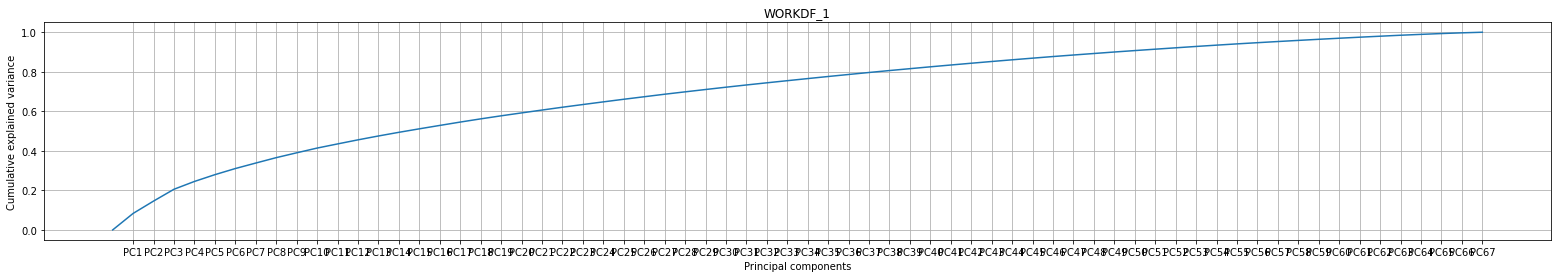

In [23]:
pca_1 = PCA(random_state = rs)
pca_1.fit(workdf_1)
plt.figure(figsize = (27,4))
plt.plot(np.insert(np.cumsum(pca_1.explained_variance_ratio_), 0, 0))
plt.title('WORKDF_1')
plt.xticks(ticks=np.arange(1, pca_1.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_1.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()
# print(np.cumsum(pca_1.explained_variance_ratio_))
# # mPrime = (np.cumsum(pca_1.explained_variance_ratio_) >= 0.30).sum()
# m = min(4, 5)

In [24]:
mPrime = (np.cumsum(pca_1.explained_variance_ratio_) <= 0.30).sum()
m = min(mPrime, 5)

In [25]:
m

5

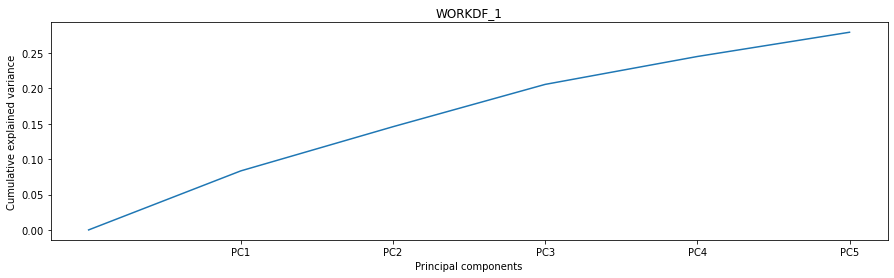

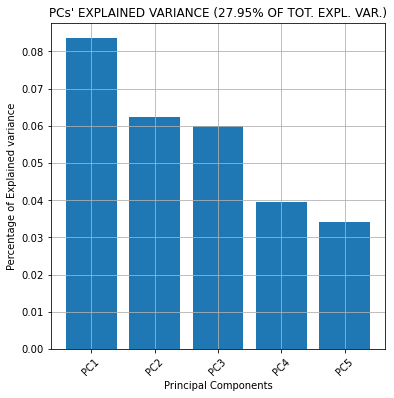

In [26]:
pca_1_m = PCA(n_components = m, random_state = rs)
pca_1_m.fit(workdf_1)
workdf_1_trans = pca_1_m.transform(workdf_1)
eps = np.sqrt(1 / pca_1.n_features_)

plt.figure(figsize=(15,4))
plt.plot(np.insert(np.cumsum(pca_1_m.explained_variance_ratio_), 0, 0))
plt.title('WORKDF_1')
plt.xticks(ticks=np.arange(1, pca_1_m.n_components + 1), 
           labels=[f'PC{i}' for i in range(1, pca_1_m.n_components + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

plt.figure(figsize=(6, 6))
plt.bar(range(1, m + 1), pca_1_m.explained_variance_ratio_)
plt.title(f"PCs' EXPLAINED VARIANCE ({np.round(pca_1_m.explained_variance_ratio_.sum() * 100, decimals=2)}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1, m + 1), 
           labels=[f'PC{i}' for i in range(1, m + 1)],
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

Here we have basically shown the cumulative explained variance in order to look at how much each chosen Principal Component explains the cumulative total variance.

## Exercise 4
### Interpretation of the PCs

Now we have to analyse the PCs with respect to the weight that every feature have in that Principal Component. To deal with this we showed a barplot where every feature is represented with respect to every PC. Then we assigned a threshold values that is $ \epsilon = \sqrt{\frac{1}{n}} $ where n is the total number of features.

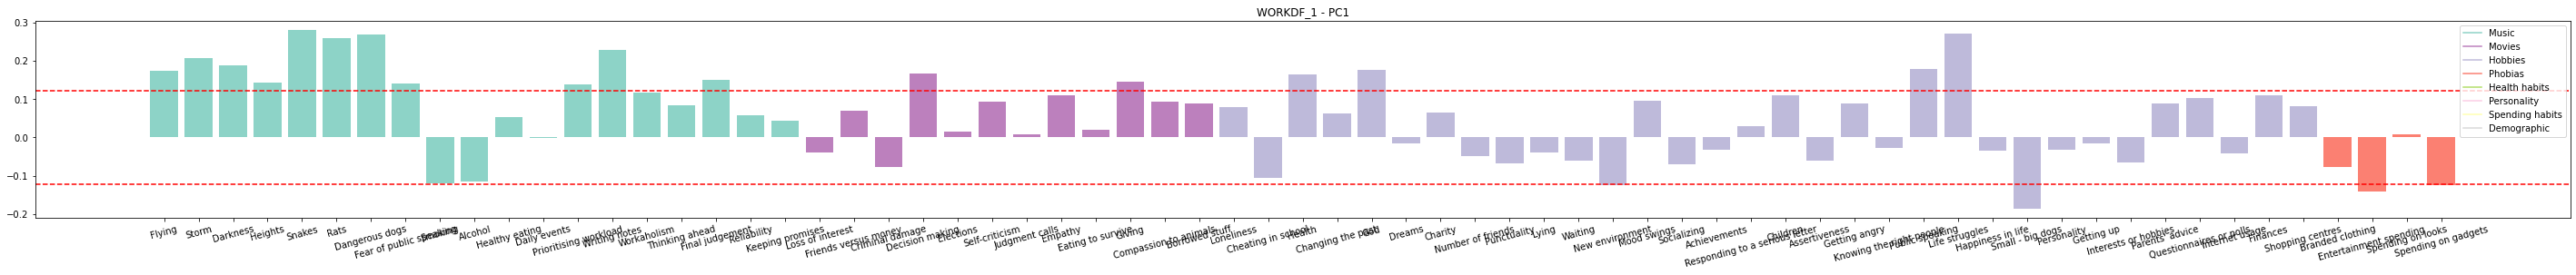

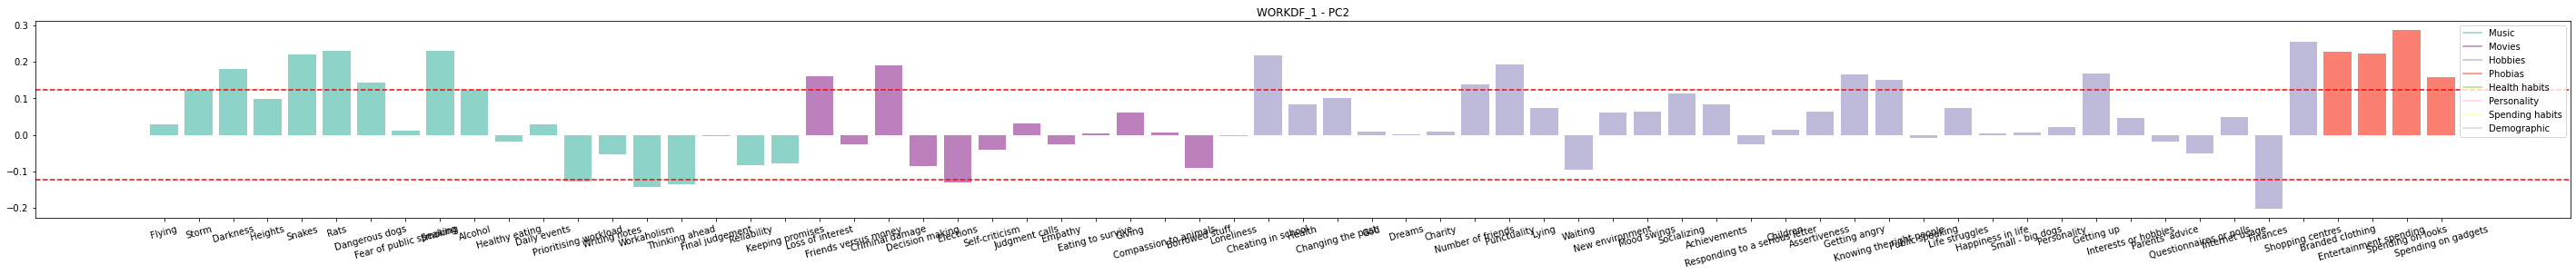

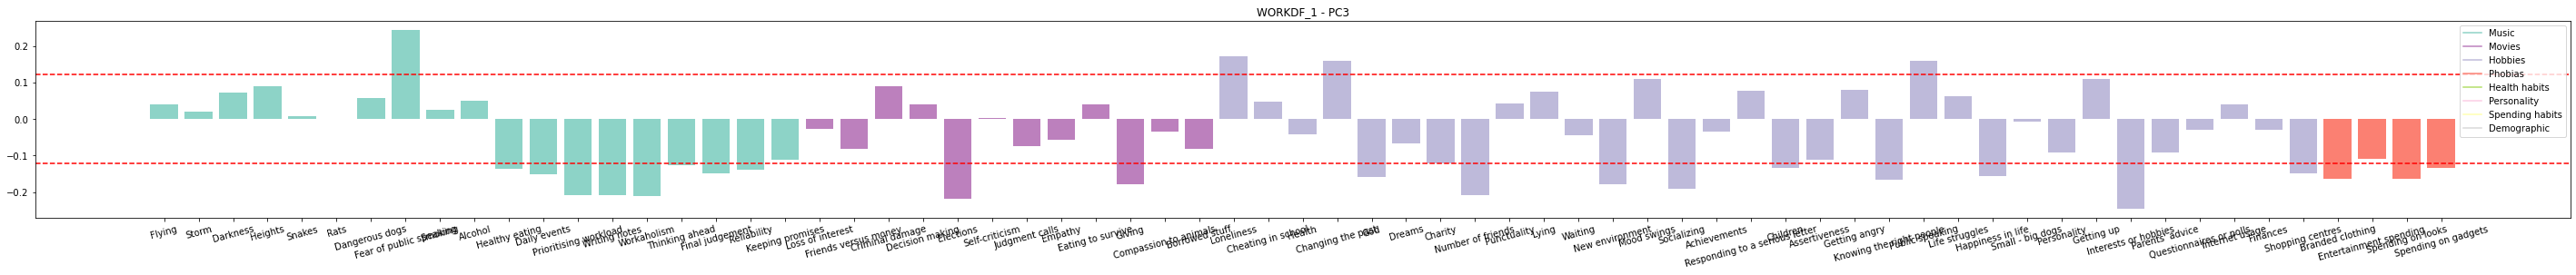

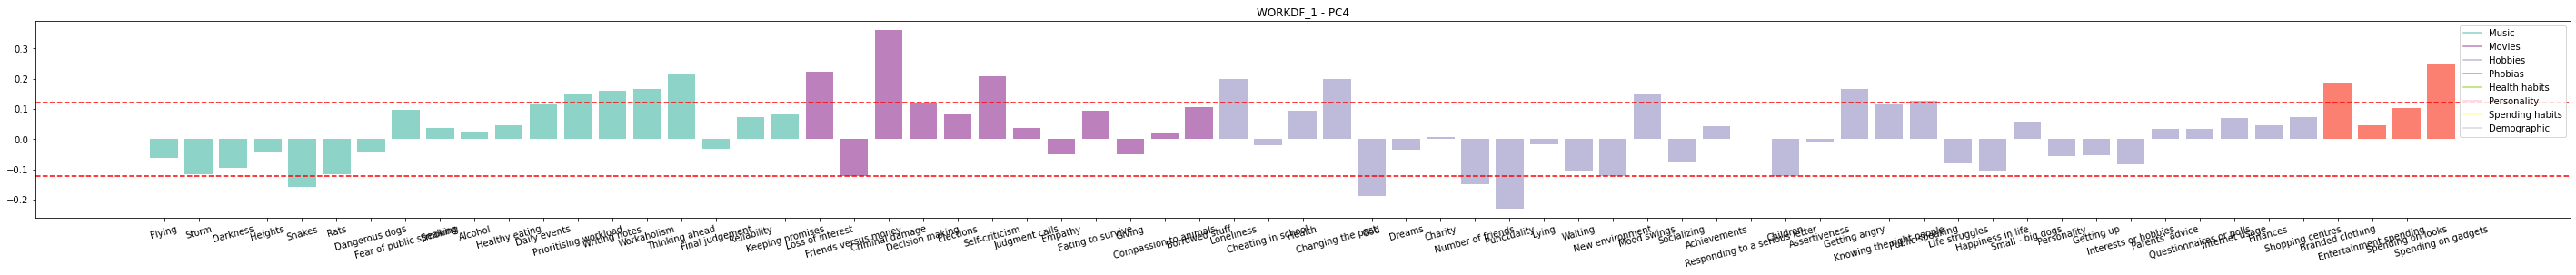

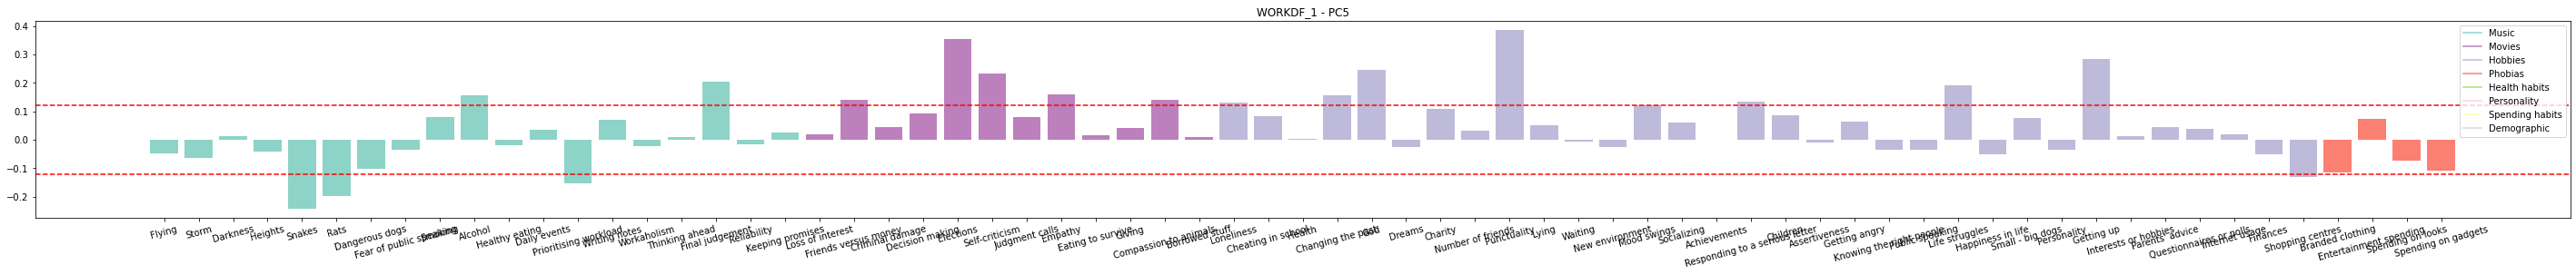

In [27]:
eps = np.sqrt(1/pca_1_m.n_features_)

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
types = [df_columns.loc[df_columns['type'] == s]['color'].values[0] for s in df_columns['type']]

type_colors_legend = [Line2D([0], [0], color=type_colors[k]) for k in type_colors.keys()]

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_1_m.n_features_), pca_1_m.components_[0, :], color = types)
plt.xticks(ticks=np.arange(pca_1_m.n_features_), 
           labels=workdf_1.columns.to_list(),
           rotation=15)
plt.title('WORKDF_1 - PC1')
plt.axhline(y = eps, color = 'r', linestyle = '--')
plt.axhline(y = -eps, color = 'r', linestyle = '--')
plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.show()




plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_1_m.n_features_), pca_1_m.components_[1, :], color = types)
plt.xticks(ticks=np.arange(pca_1_m.n_features_), 
           labels=workdf_1.columns.to_list(),
           rotation=15)
plt.title('WORKDF_1 - PC2')
plt.axhline(y = eps, color = 'r', linestyle = '--')
plt.axhline(y = -eps, color = 'r', linestyle = '--')
plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_1_m.n_features_), pca_1_m.components_[2, :], color = types)
plt.xticks(ticks=np.arange(pca_1_m.n_features_), 
           labels=workdf_1.columns.to_list(),
           rotation=15)
plt.title('WORKDF_1 - PC3')
plt.axhline(y = eps, color = 'r', linestyle = '--')
plt.axhline(y = -eps, color = 'r', linestyle = '--')
plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_1_m.n_features_), pca_1_m.components_[3, :], color = types)
plt.xticks(ticks=np.arange(pca_1_m.n_features_), 
           labels=workdf_1.columns.to_list(),
           rotation=15)
plt.title('WORKDF_1 - PC4')
plt.axhline(y = eps, color = 'r', linestyle = '--')
plt.axhline(y = -eps, color = 'r', linestyle = '--')
plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_1_m.n_features_), pca_1_m.components_[4, :], color = types)
plt.xticks(ticks=np.arange(pca_1_m.n_features_), 
           labels=workdf_1.columns.to_list(),
           rotation=15)
plt.title('WORKDF_1 - PC5')
plt.axhline(y = eps, color = 'r', linestyle = '--')
plt.axhline(y = -eps, color = 'r', linestyle = '--')
plt.legend(type_colors_legend, [k for k in type_colors.keys()])
plt.show()

In [28]:
for ii in range(m):
    ind_great_pos_PCii = np.argwhere(pca_1_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_1_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [workdf_1.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [workdf_1.columns[i] for i in ind_great_neg_PCii]
    
    
    print('')
    print(f' We can notice that the most relevant features in PC{ii+1} are :')
    print(f'(Positive contribute)\n{great_pos_PCii}. ')
    print('')
    print(f'(Negative contribute)\n{great_neg_PCii}. ')
    print('')


 We can notice that the most relevant features in PC1 are :
(Positive contribute)
['Flying', 'Storm', 'Darkness', 'Heights', 'Snakes', 'Rats', 'Dangerous dogs', 'Fear of public speaking', 'Prioritising workload', 'Writing notes', 'Final judgement', 'Decision making', 'Giving', 'Health', 'God', 'Public speaking', 'Life struggles']. 

(Negative contribute)
['New environment', 'Small - big dogs', 'Entertainment spending', 'Spending on gadgets']. 


 We can notice that the most relevant features in PC2 are :
(Positive contribute)
['Storm', 'Darkness', 'Snakes', 'Rats', 'Dangerous dogs', 'Smoking', 'Alcohol', 'Loss of interest', 'Criminal damage', 'Cheating in school', 'Number of friends', 'Punctuality', 'Getting angry', 'Knowing the right people', 'Getting up', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets']. 

(Negative contribute)
['Prioritising workload', 'Workaholism', 'Thinking ahead', 'Elections', 'Finances']. 


 We can 

We will identify the personality of 5 profiles of people.
# PC1:Phobic attitude(+),personality trait(-)
For positive weights we can see in the graph dominance of People have a phobia of snaks,rats, dangerours dogs.
For Negative weights if we look most people prefer smalls dogs over big dogs...
# PC2: Money spending attitude(+),Money saving attitude(-)
for positive weights we can see majority like to spend on looks, entertainment or branded clothes
for negative weights we see are finances so people like to  save money...
# PC3: Phobic attitude(+),Workohlism attitude(-)
for highest positive weight we can see people have a phobia of a dangerous dogs
for negative we can see group of people like to work and write notes etc
# PC4:Criminal attitude(+),Punctuality attitude(-)
for positive weight we see that people had anger issues and destroyed stuff while being angry ,Criminal damage.
for negative weight we see that people like to be on time,Punctuality.
# PC5:Personality issuess attittude(+), phobic attitude(-)
we see that for positive weights people like to puctual. and also some people have issues getting up early it is personality attitude..
for negative again we see that people are afraid of snakes and rats..

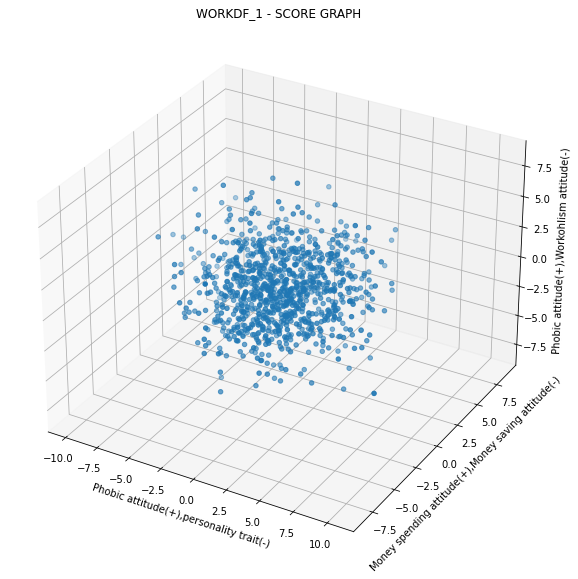

Here is the graph of the point cloud with respect to the first three Principal Components. We decided to take in account the
first three PCs because they are the one which best explain the 30% of the total vaiance among the 4


In [29]:
pc_names = ['Phobic attitude(+),personality trait(-)', 'Money spending attitude(+),Money saving attitude(-)', 'Phobic attitude(+),Workohlism attitude(-)', 'PCA to be named 4','PCA to be named 5']
fig_score = plt.figure(figsize = (10,10))
ax = fig_score.add_subplot(111, projection='3d')
ax.scatter(workdf_1_trans[:, 0], workdf_1_trans[:, 1], workdf_1_trans[:, 2]) #------> come faccio a dare dei colori se non ho una colonna di target?
plt.title('WORKDF_1 - SCORE GRAPH')
ax.set_xlabel('Phobic attitude(+),personality trait(-)')
ax.set_ylabel('Money spending attitude(+),Money saving attitude(-)')
ax.set_zlabel('Phobic attitude(+),Workohlism attitude(-)')
plt.grid()
plt.show()
print('Here is the graph of the point cloud with respect to the first three Principal Components. We decided to take in account the\nfirst three PCs because they are the one which best explain the 30% of the total vaiance among the 4')

## Exercise 5
### k-Means
Now that we have our clean dataset that is represented in the new reference system where the axis are the directions along which the explained variance is maximised, we can run the k-Means algorithm to cluster the data and finally define the profiles of people who present a peculiar behaviour. 
First of all we had to choose a proper number of clusers by means of an analysis on the **silhouette score**. The silhouette value (that ranges between -1 and +1) is a measure of how well a data is matched in the assigned cluster and how poorly is matched to the neighboring clusters. \
$ s(i) = \frac{b(i) - a(i)}{max(b(i), a(i))} $  
\
Where: 
* $ a(i) $ is the sum of the distance from the data i to the other data of the same cluster
* $ b(i) $ is the minimum disance between the data i to all the points of other clusters to which data i does not belong to



For n_clusters = 3 The average silhouette_score is : 0.1600612816313558
For n_clusters = 4 The average silhouette_score is : 0.1575706599019065
For n_clusters = 5 The average silhouette_score is : 0.14788324606521916
For n_clusters = 6 The average silhouette_score is : 0.14515987569322433
For n_clusters = 7 The average silhouette_score is : 0.14048578098991207
For n_clusters = 8 The average silhouette_score is : 0.14242626725932986
For n_clusters = 9 The average silhouette_score is : 0.14091204772537214
For n_clusters = 10 The average silhouette_score is : 0.14196152285527222


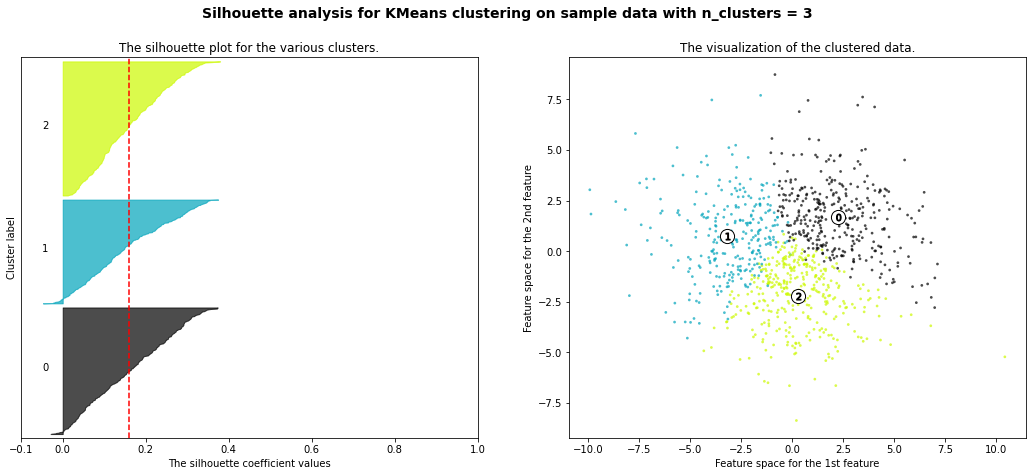

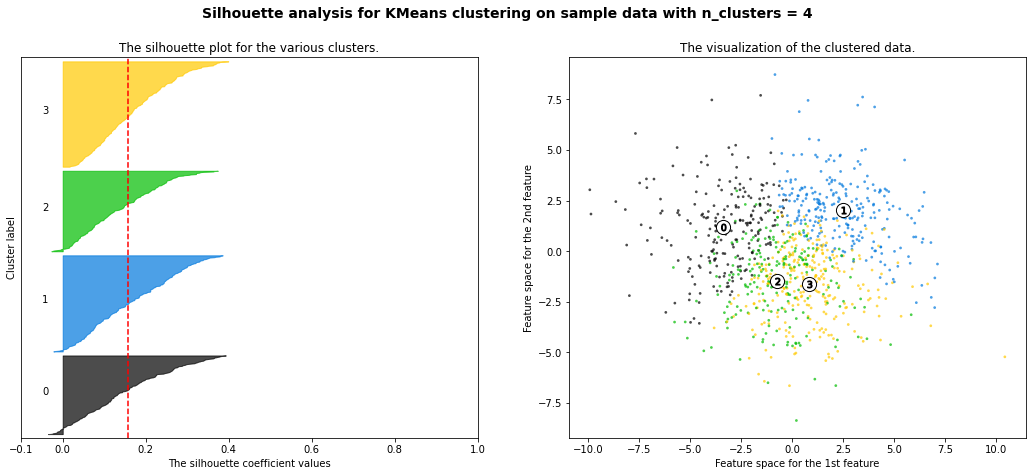

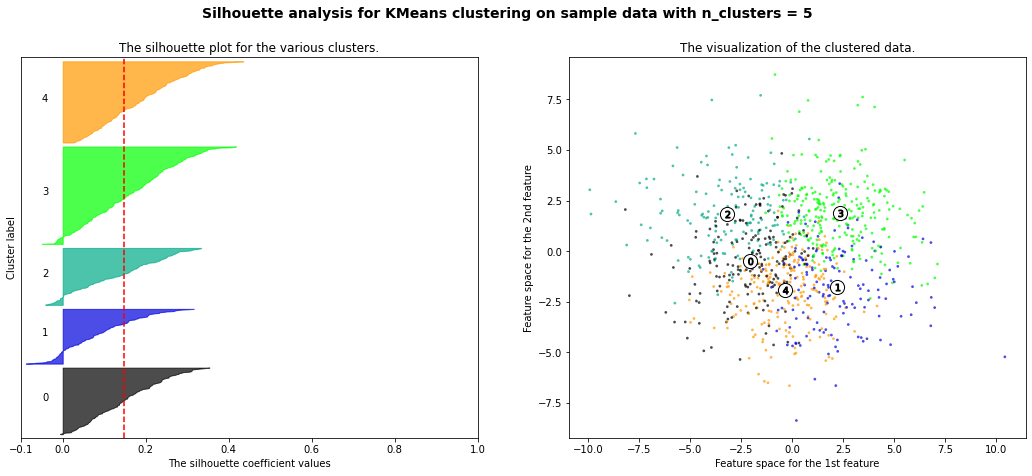

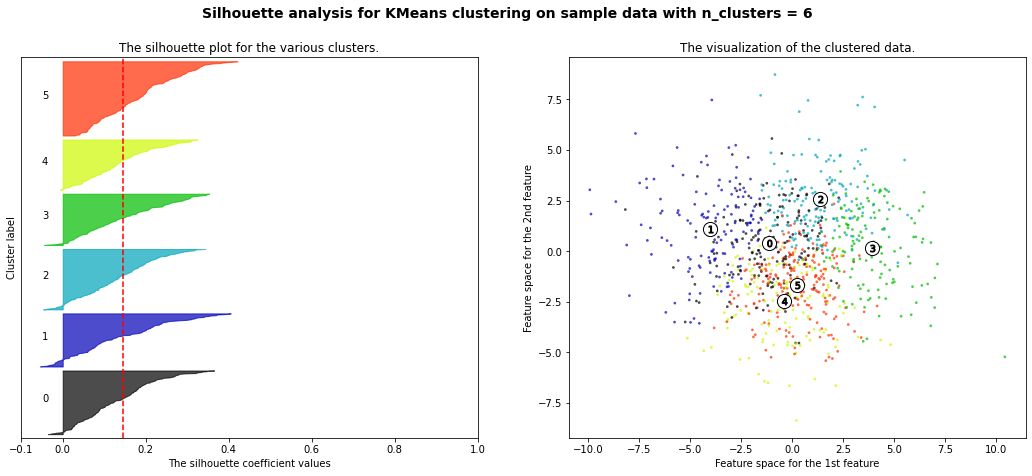

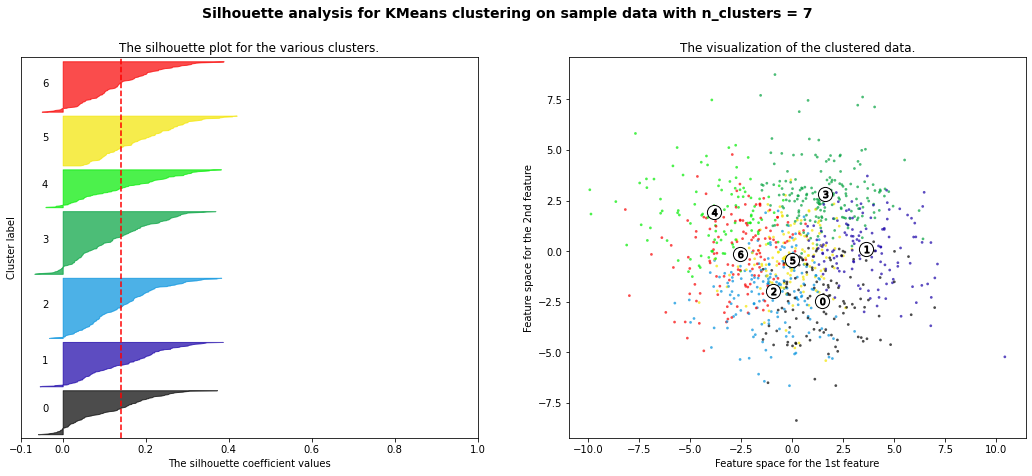

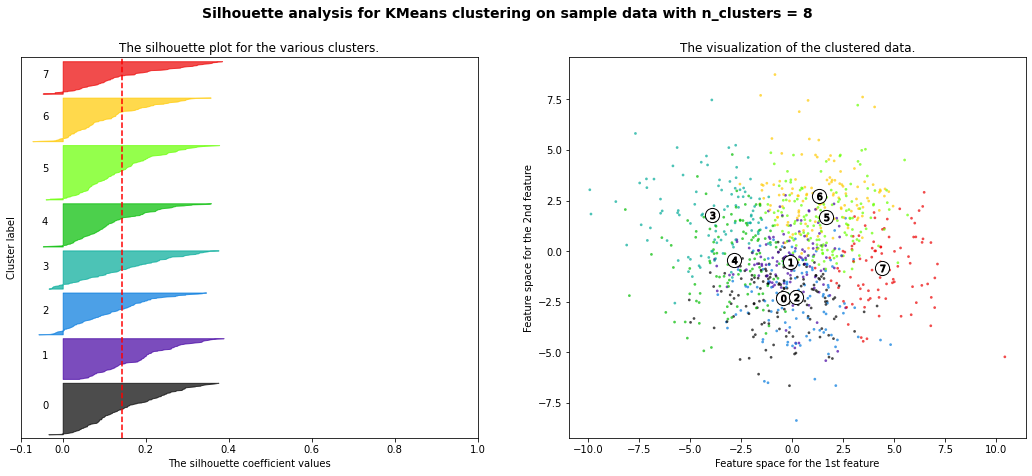

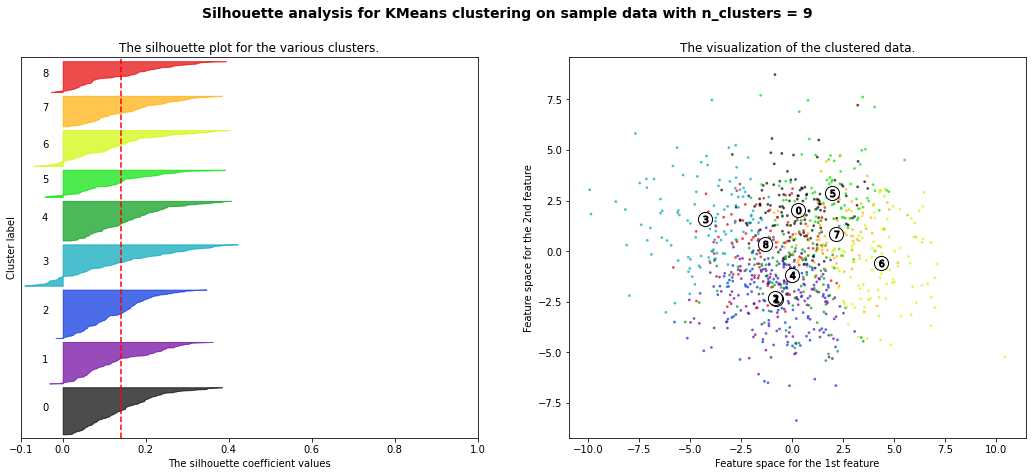

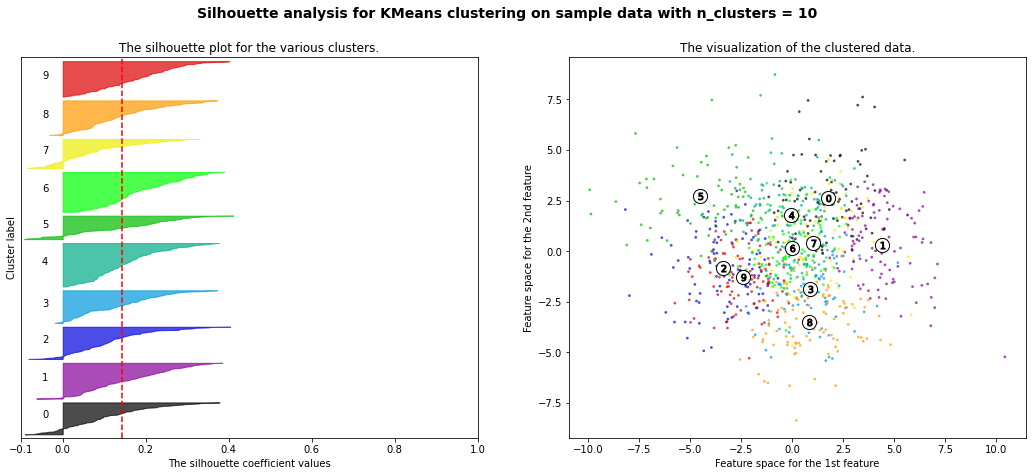

In [30]:
for n_clusters in range(3,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(workdf_1_trans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    y_predicted = clusterer.fit_predict(workdf_1_trans)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(workdf_1_trans, y_predicted)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(workdf_1_trans, y_predicted)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[y_predicted == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(y_predicted.astype(float) / n_clusters)
    ax2.scatter(
        workdf_1_trans[:, 0], workdf_1_trans[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



As we have noticed, the optimal number of clusters, such that the average silhouette coefficient is the maximized, is equal to 3. Hence we have run the k-Means algorithm for the actual number of clusters:

In [31]:
KM = KMeans(n_clusters = 3, random_state = rs)
KM.fit(workdf_1_trans)
y_predict = KM.predict(workdf_1_trans)
# centroids.append(KM.cluster_centers_)
# silhouette_vals.append(silhouette_score(workdf_1_trans,y_predict))

## Exercise 6
### Centroid Interpretation and Visualization

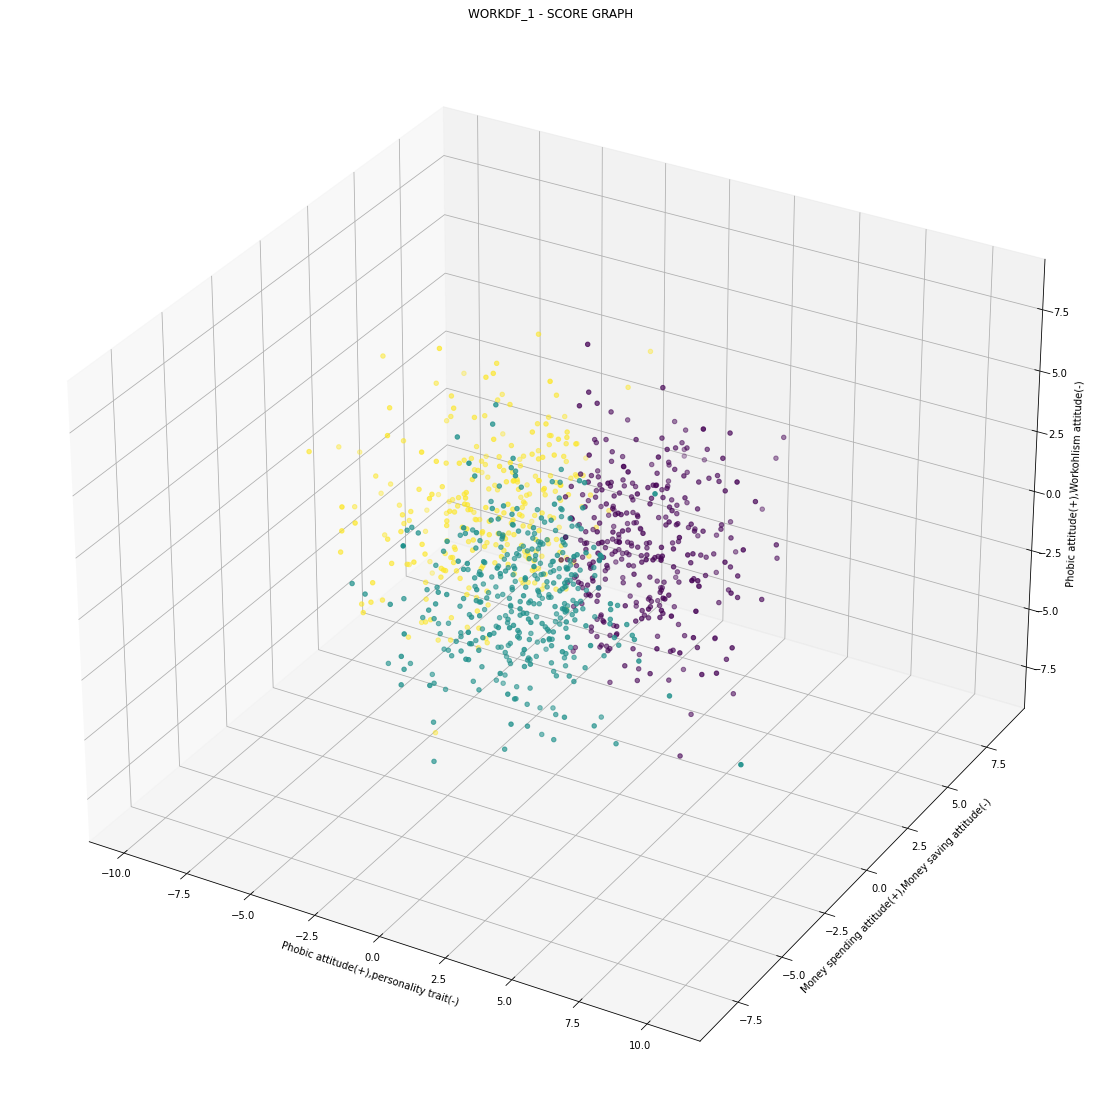

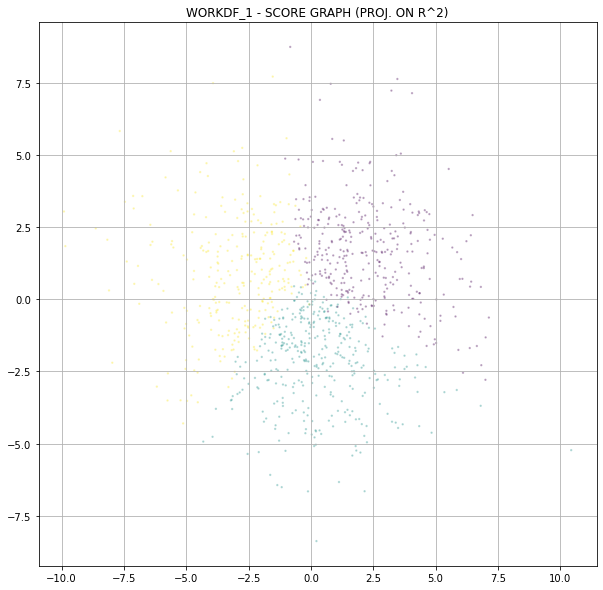

In [32]:
# MAKE THE 3D SCORE GRAPH
fig_score = plt.figure(figsize=(20,20))
ax = fig_score.add_subplot(111, projection='3d')
ax.scatter(workdf_1_trans[:, 0], workdf_1_trans[:, 1], workdf_1_trans[:, 2], c = y_predict) 
plt.title('WORKDF_1 - SCORE GRAPH')
ax.set_xlabel('Phobic attitude(+),personality trait(-)')
ax.set_ylabel('Money spending attitude(+),Money saving attitude(-)')
ax.set_zlabel('Phobic attitude(+),Workohlism attitude(-)')
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(10,10))
plt.scatter(workdf_1_trans[:, 0], workdf_1_trans[:, 1], s=2, c=y_predict, alpha=0.25)
plt.title('WORKDF_1 - SCORE GRAPH (PROJ. ON R^2)')
ax.set_xlabel('Phobic attitude(+),personality trait(-)')
ax.set_ylabel('Money spending attitude(+),Money saving attitude(-)')
plt.grid()
plt.show()

## Exercise 8
### Computation of the PCs (Workdf_tot)


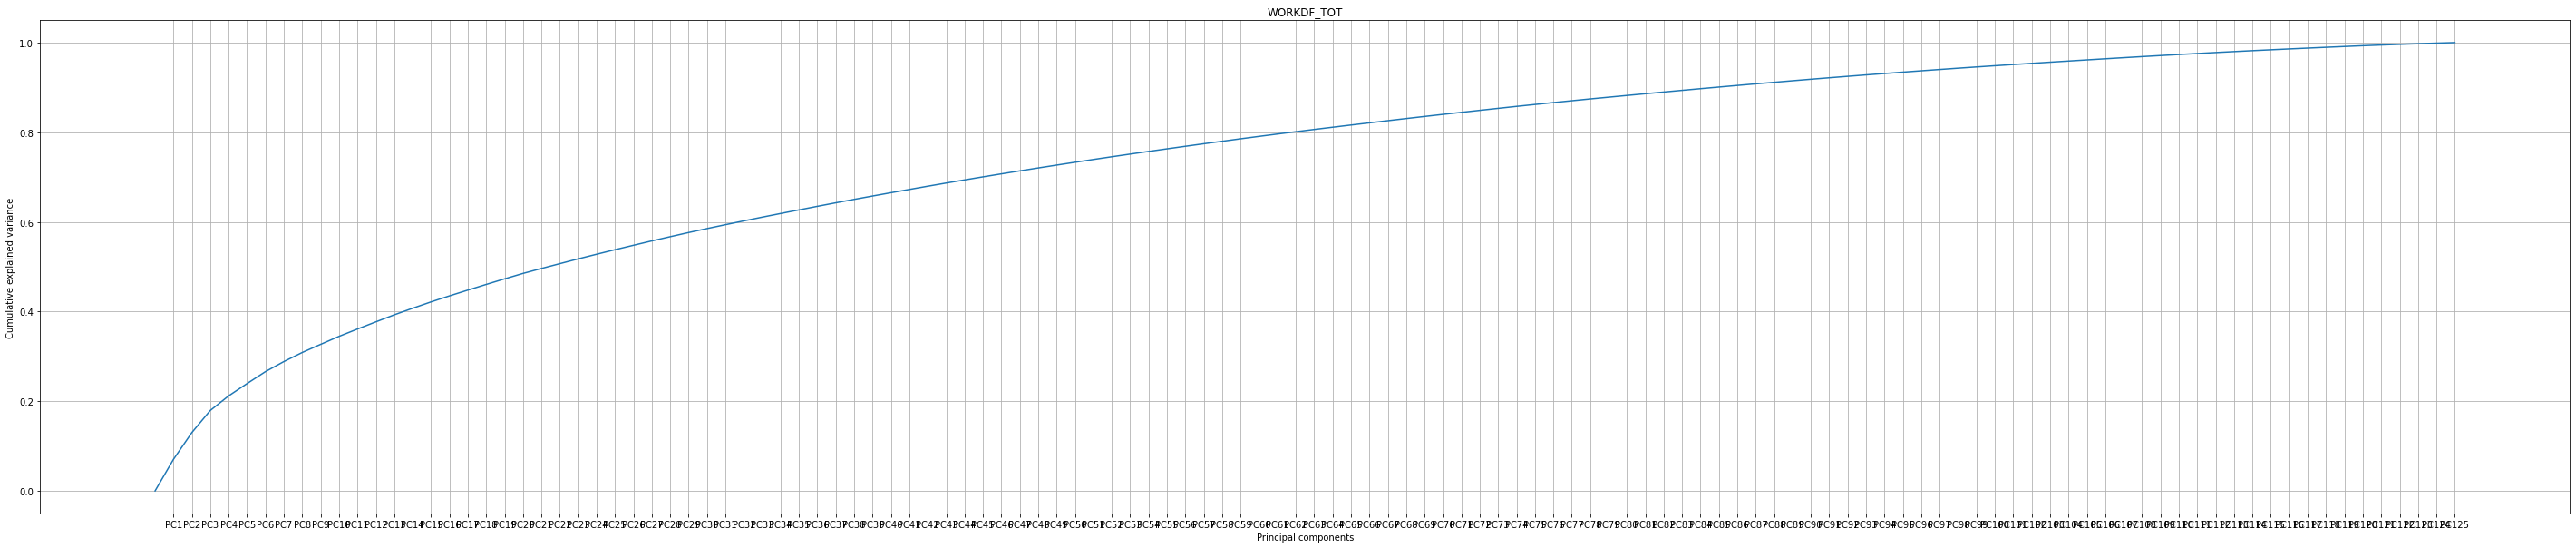

mPrime is:  7


In [33]:
pca_tot = PCA(random_state = rs)
pca_tot.fit(workdf_tot)
plt.figure(figsize = (50,10))
plt.plot(np.insert(np.cumsum(pca_tot.explained_variance_ratio_), 0, 0))
plt.title('WORKDF_TOT')
plt.xticks(ticks=np.arange(1, pca_tot.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_tot.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()
mPrime = (np.cumsum(pca_tot.explained_variance_ratio_) <= 0.30).sum()
m=min(mPrime,6)
print('mPrime is: ',mPrime)



In order to extract the number of PCs which are required for the analysis, we have to have a look at the comulative explained variance (of workdf_tot) and we noticed that the number of Principal Componed that explained **at least** the 30% of the variance is 7. Since the task required $ m=\min(m',6)$ then $ m = 6 $. 

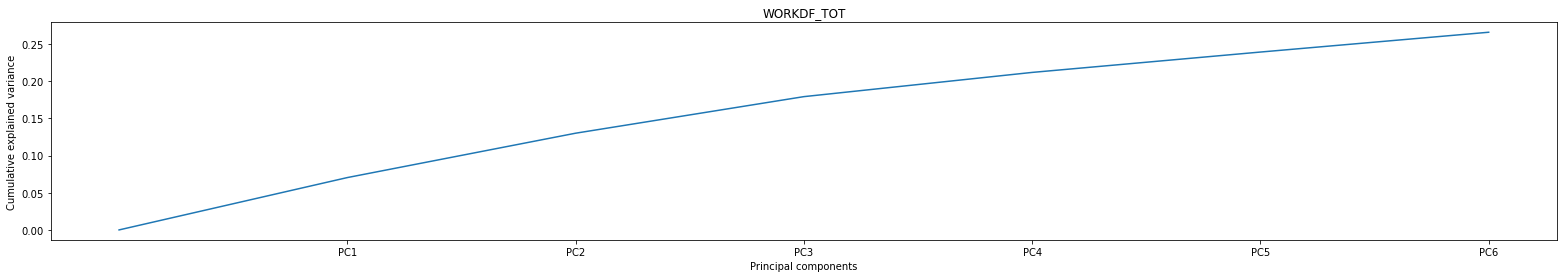

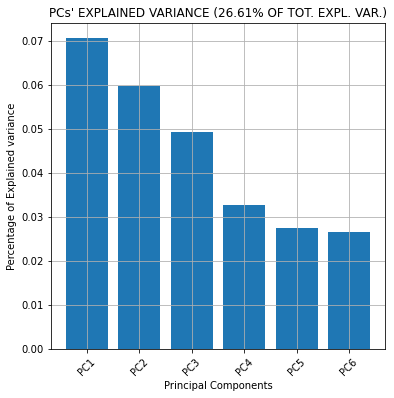

In [34]:
pca_tot_m = PCA(n_components = m)
pca_tot_m.fit(workdf_tot)
workdf_tot_trans = pca_tot_m.transform(workdf_tot)

plt.figure(figsize=(27,4))
plt.plot(np.insert(np.cumsum(pca_tot_m.explained_variance_ratio_), 0, 0))
plt.title('WORKDF_TOT')
plt.xticks(ticks=np.arange(1, pca_tot_m.n_components + 1), 
           labels=[f'PC{i}' for i in range(1, pca_tot_m.n_components + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

plt.figure(figsize=(6, 6))
plt.bar(range(1, m + 1), pca_tot_m.explained_variance_ratio_)
plt.title(f"PCs' EXPLAINED VARIANCE ({np.round(pca_tot_m.explained_variance_ratio_.sum() * 100, decimals=2)}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1, m + 1), 
           labels=[f'PC{i}' for i in range(1, m + 1)],
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

Here we have basically shown the cumulative explained variance in order to look at how much each chosen Principal Component explains the cumulative total variance.

## Exercise 9
### Interpretation of the PCs
Now we have to analyse the PCs with respect to the weight that every feature have in that Principal Component. To deal with this we showed a barplot where every feature is represented with respect to every PC. Then we assigned a threshold values that is $ \epsilon = \sqrt{\frac{1}{n}} $ where n is the total number of features but the resulting value was very low, then the interpretation would have been unfeasible because a very high number of features had a weight higher then $ \epsilon $. Hence, since the threshold is arbitrary, we decided to set it to $ |\epsilon| = 0.1 $

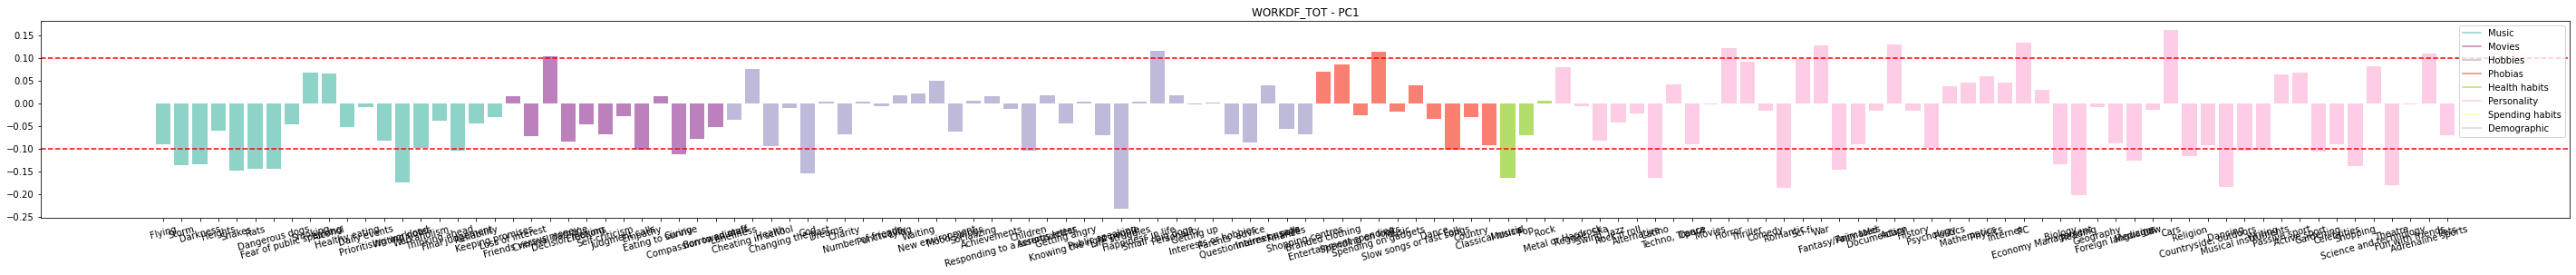

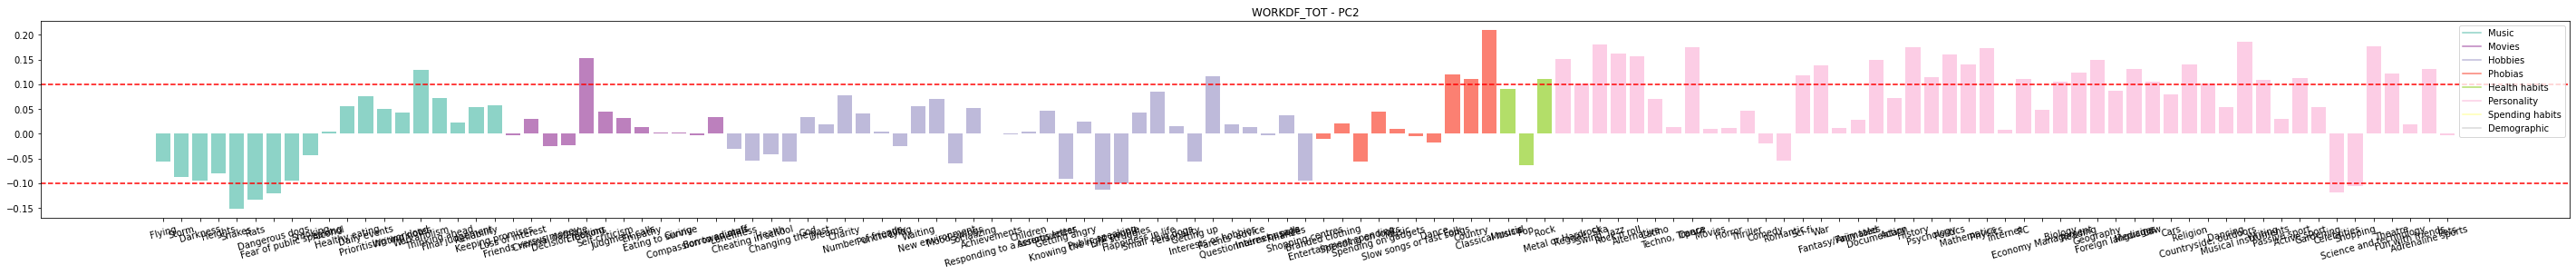

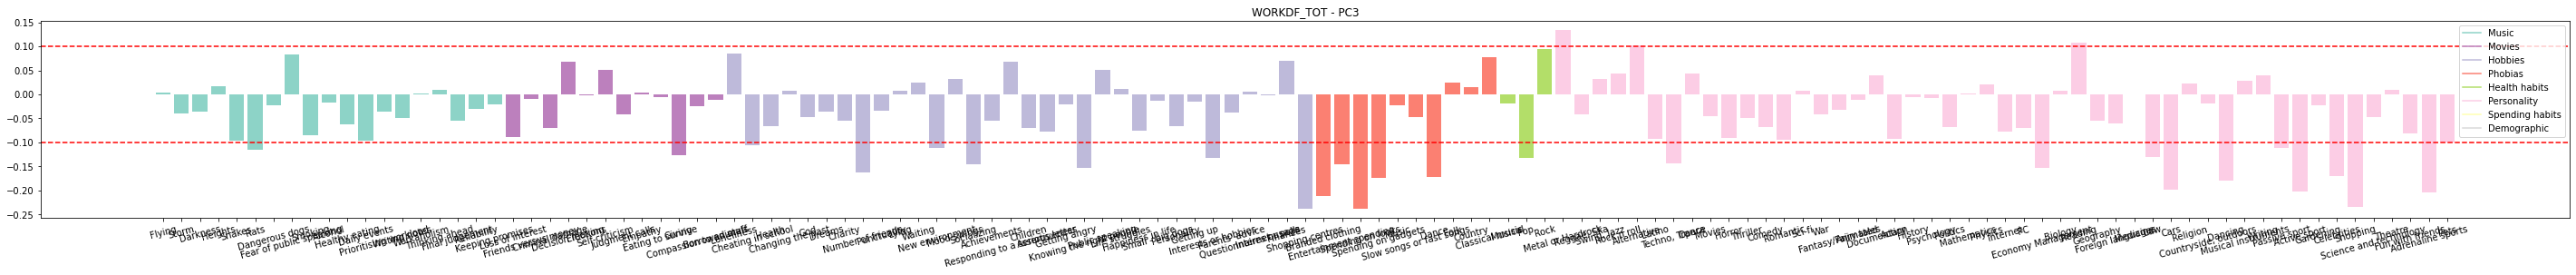

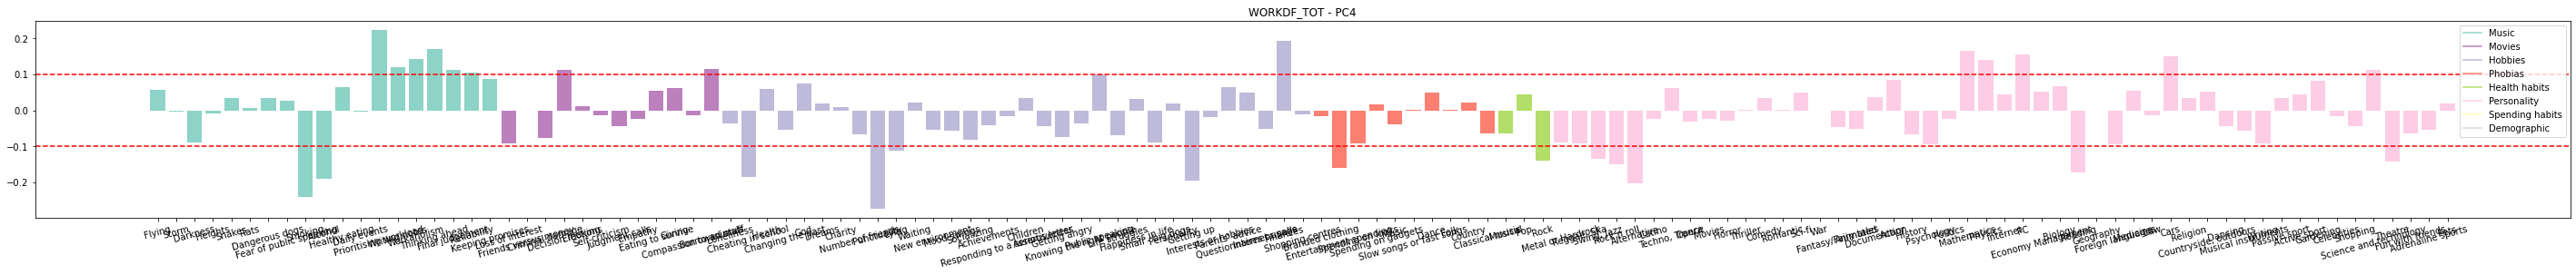

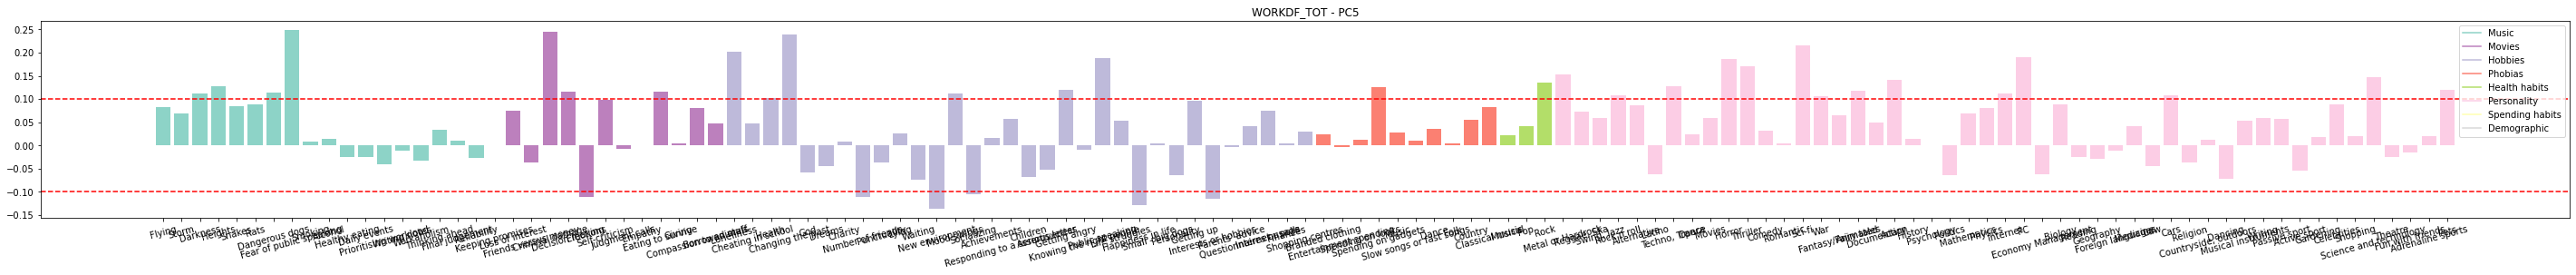

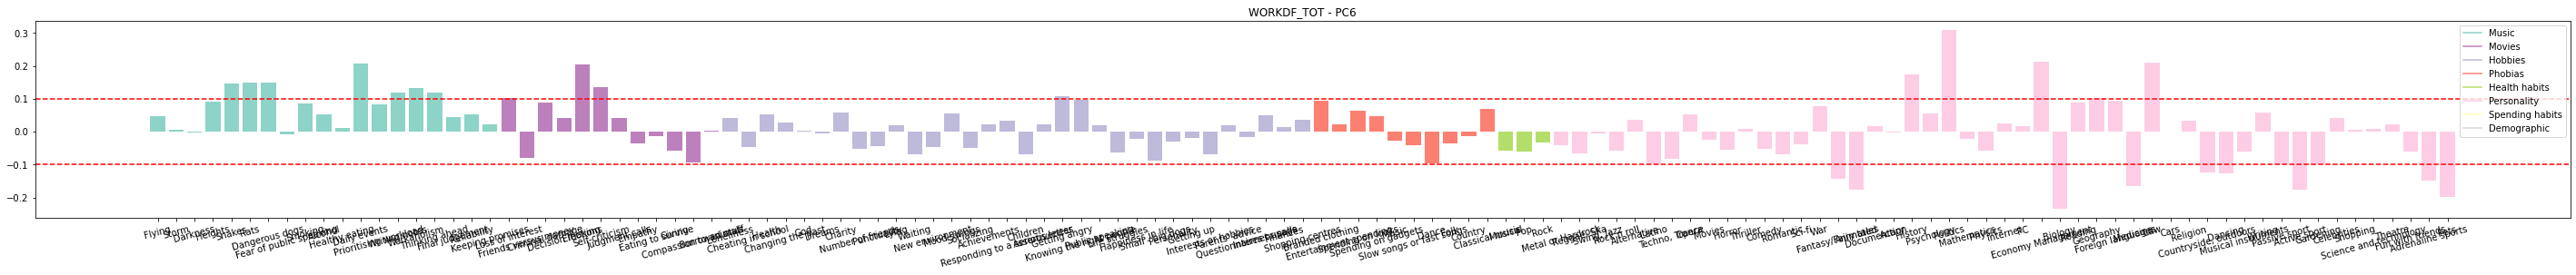

In [35]:
eps = np.sqrt(1/pca_tot_m.n_features_)

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
types_2 = [df_columns.loc[df_columns['type'] == s]['color'].values[0] for s in df_columns['type']]

type_colors_legend_2 = [Line2D([0], [0], color=type_colors[k]) for k in type_colors.keys()]

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_tot_m.n_features_), pca_tot_m.components_[0, :], color = types_2)
plt.xticks(ticks=np.arange(pca_tot_m.n_features_), 
           labels=workdf_tot.columns.to_list(),
           rotation=15)
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
plt.axhline(y = -0.1, color = 'r', linestyle = '--')
plt.title('WORKDF_TOT - PC1')
plt.legend(type_colors_legend_2, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_tot_m.n_features_), pca_tot_m.components_[1, :], color = types_2)
plt.xticks(ticks=np.arange(pca_tot_m.n_features_), 
           labels=workdf_tot.columns.to_list(),
           rotation=15)
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
plt.axhline(y = -0.1, color = 'r', linestyle = '--')
plt.title('WORKDF_TOT - PC2')
plt.legend(type_colors_legend_2, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_tot_m.n_features_), pca_tot_m.components_[2, :], color = types_2)
plt.xticks(ticks=np.arange(pca_tot_m.n_features_), 
           labels=workdf_tot.columns.to_list(),
           rotation=15)
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
plt.axhline(y = -0.1, color = 'r', linestyle = '--')
plt.title('WORKDF_TOT - PC3')
plt.legend(type_colors_legend_2, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_tot_m.n_features_), pca_tot_m.components_[3, :], color = types_2)
plt.xticks(ticks=np.arange(pca_tot_m.n_features_), 
           labels=workdf_tot.columns.to_list(),
           rotation=15)
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
plt.axhline(y = -0.1, color = 'r', linestyle = '--')
plt.title('WORKDF_TOT - PC4')
plt.legend(type_colors_legend_2, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_tot_m.n_features_), pca_tot_m.components_[4, :], color = types_2)
plt.xticks(ticks=np.arange(pca_tot_m.n_features_), 
           labels=workdf_tot.columns.to_list(),
           rotation=15)
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
plt.axhline(y = -0.1, color = 'r', linestyle = '--')
plt.title('WORKDF_TOT - PC5')
plt.legend(type_colors_legend_2, [k for k in type_colors.keys()])
plt.show()

plt.figure(figsize=(50,4))
f = plt.bar(np.arange(pca_tot_m.n_features_), pca_tot_m.components_[5, :], color = types_2)
plt.xticks(ticks=np.arange(pca_tot_m.n_features_), 
           labels=workdf_tot.columns.to_list(),
           rotation=15)
plt.axhline(y = 0.1, color = 'r', linestyle = '--')
plt.axhline(y = -0.1, color = 'r', linestyle = '--')
plt.title('WORKDF_TOT - PC6')
plt.legend(type_colors_legend_2, [k for k in type_colors.keys()])
plt.show()

In [36]:
print(eps)
# qui si può creare una tabella: colonne(high valued components positive/negative), righe (PCs)
for ii in range(6):
    ind_great_pos_PCii = np.argwhere(pca_tot_m.components_[ii, :] >= 0.10).flatten()
    ind_great_neg_PCii = np.argwhere(pca_tot_m.components_[ii, :] <= -0.10).flatten()
    
    great_pos_PCii = [workdf_tot.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [workdf_tot.columns[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f' We can notice that the most relevant features in PC{ii+1} are :')
    print(f'{great_pos_PCii}. (Positive contribute)')
    print('')
    print(f'{great_neg_PCii}. (Negative contribute)')
    print('')

0.08944271909999159

 We can notice that the most relevant features in PC1 are :
['Criminal damage', 'Small - big dogs', 'Spending on gadgets', 'Horror', 'War', 'Action', 'PC', 'Cars', 'Adrenaline sports']. (Positive contribute)

['Storm', 'Darkness', 'Snakes', 'Rats', 'Dangerous dogs', 'Writing notes', 'Final judgement', 'Empathy', 'Giving', 'God', 'Children', 'Life struggles', 'Folk', 'Musical', 'Latino', 'Romantic', 'Fantasy/Fairy tales', 'Biology', 'Reading', 'Medicine', 'Religion', 'Dancing', 'Musical instruments', 'Writing', 'Gardening', 'Shopping', 'Theatre']. (Negative contribute)


 We can notice that the most relevant features in PC2 are :
['Workaholism', 'Elections', 'Interests or hobbies', 'Folk', 'Country', 'Classical music', 'Rock', 'Metal or Hardrock', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Opera', 'Sci-fi', 'War', 'Documentary', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'PC', 'Biology', 'Reading', 'Geography', 'Medicine', 'Law'

We will identify the 6 Profiles of People.
# PC1:Car Lovers attitude(+),Weakness attitude(-)
we see that  for postive weight of cars is highest and
for negative weight life struggless which is a personality trait
# PC2:Music and Positive personality attitude(+),Phobic attitude(-)
# PC3:Music lover attitude(+),Different Personality Trait(-)
we see for positive weights we have dominance of people who like metal or hardrock music
we for negative weights we see alot of people like socializing, knowing th right people weights are higher for group of personality triats..
# PC4:Postive personality traits(+),phobic and punctuality triat(-)
In the positive weights we see prioritising workloard ,workohlism,thinking ahead etc
in the negative weight if we see highest is the phobias and one of punctuality triat..
# PC5:Negative personality traits(+),Positve personality traits(-)
in the postive weights we see fear of public speaking,criminal damage, cheating in school.
in the negative weights we see the new environment,happiness in life etc
# PC6:Political behavior(+),personality trait(-)
in the positive highest weight  is the politics
in the negative weights is the biology.

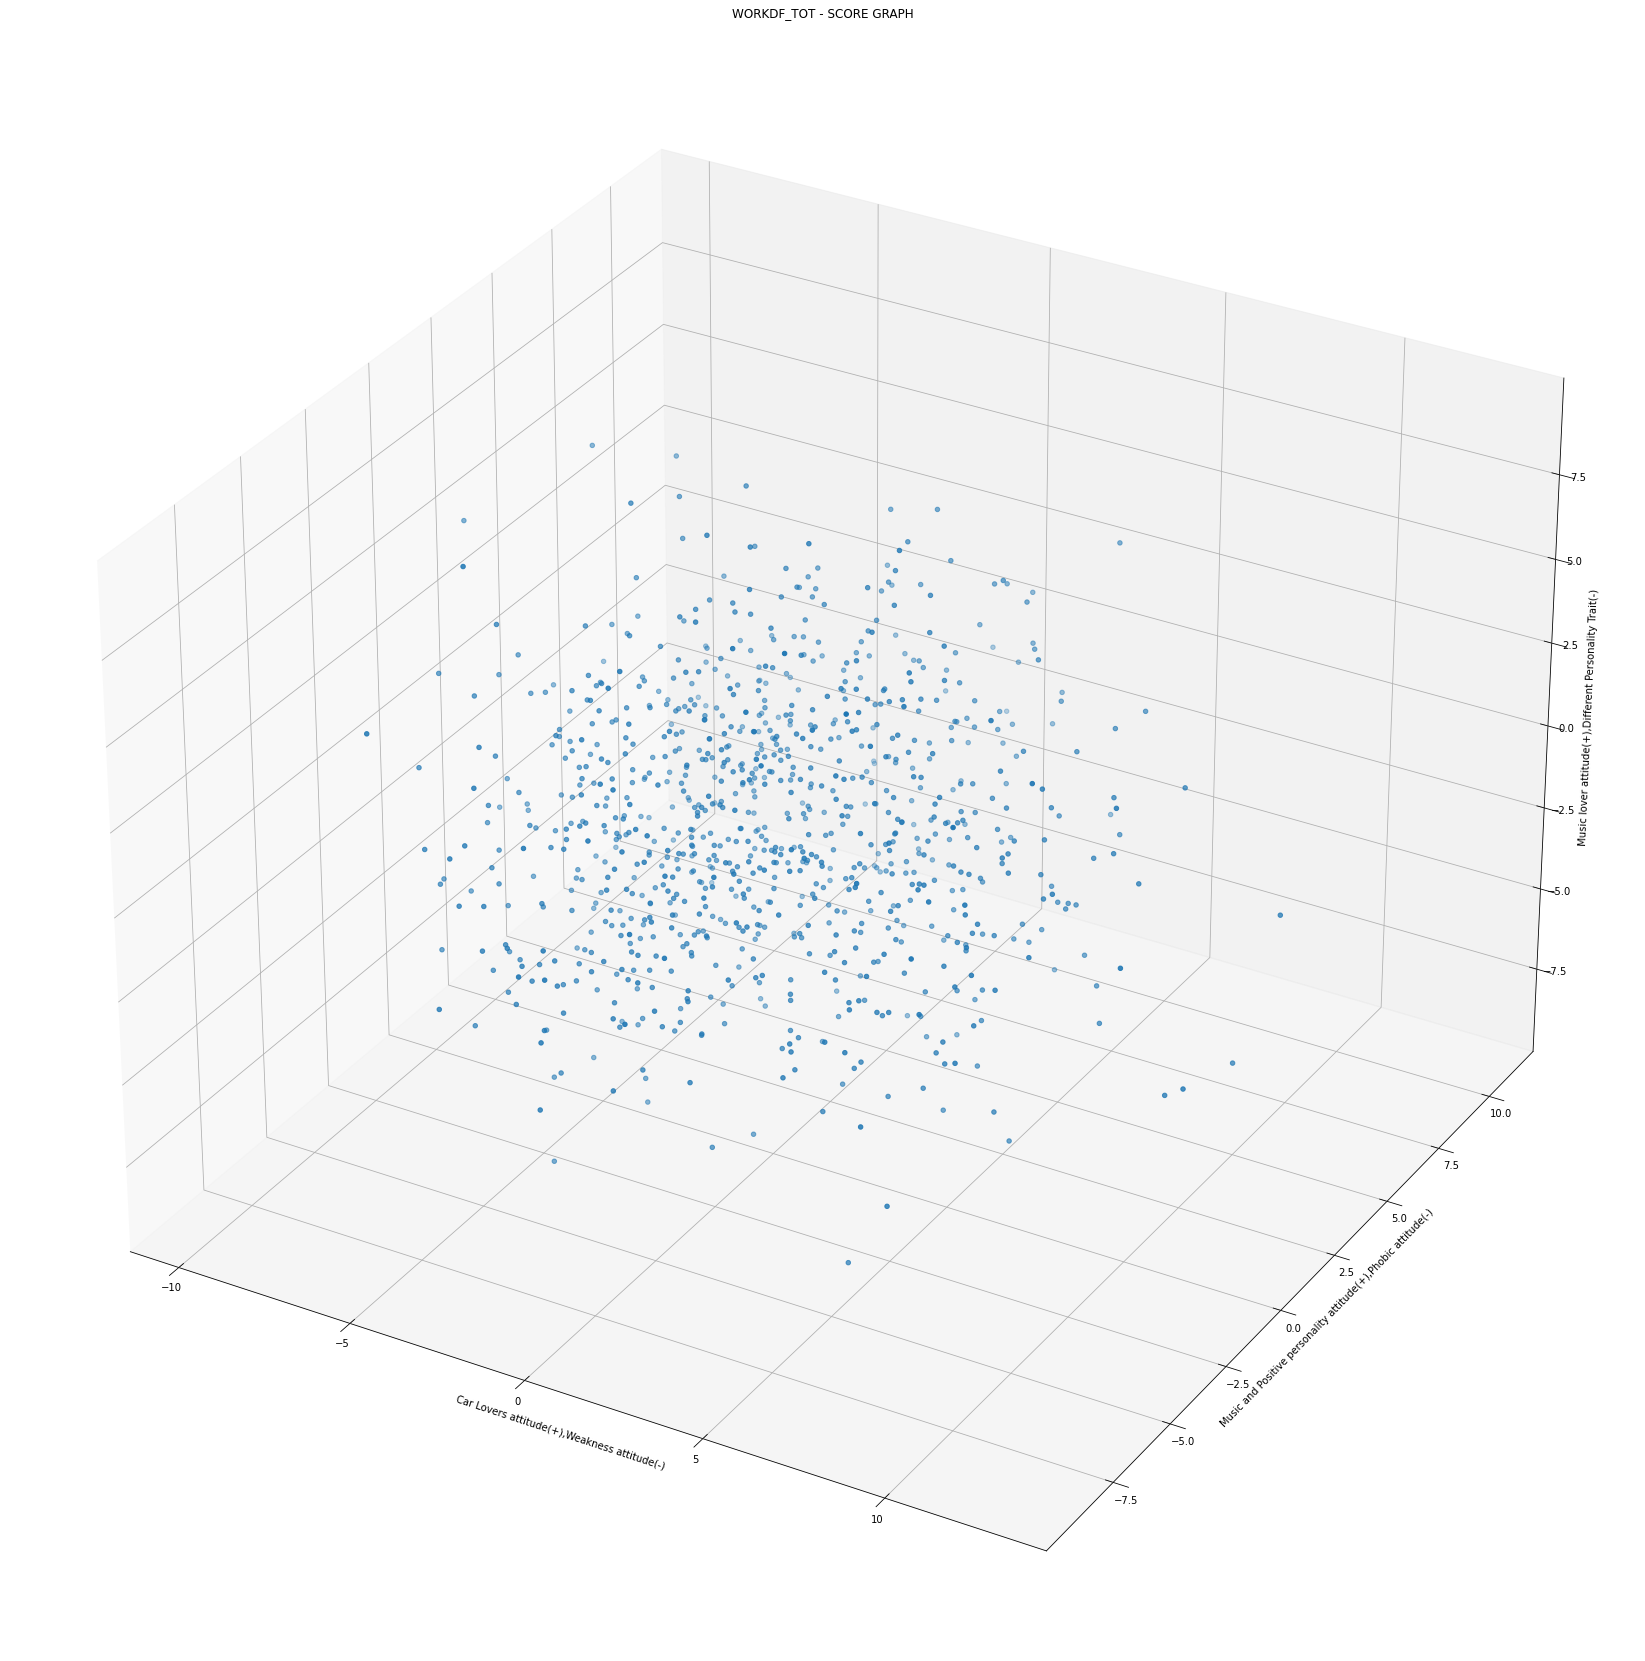

Here is the graph of the point cloud with respect to the first three Principal Components. We decided to take in account the 
first three PCs because they are the one which best explain the 30% of the total vaiance among the 6


In [37]:
fig_score = plt.figure(figsize = (30,30))
ax = fig_score.add_subplot(111, projection='3d')
ax.scatter(workdf_tot_trans[:, 0], workdf_tot_trans[:, 1], workdf_tot_trans[:, 2])
plt.title('WORKDF_TOT - SCORE GRAPH')
ax.set_xlabel('Car Lovers attitude(+),Weakness attitude(-)')
ax.set_ylabel('Music and Positive personality attitude(+),Phobic attitude(-)')
ax.set_zlabel('Music lover attitude(+),Different Personality Trait(-)')
plt.grid()
plt.show()
pc_tot_names = ['Car Lovers attitude(+),Weakness attitude(-)', 'Music and Positive personality attitude(+),Phobic attitude(-)', 'Music lover attitude(+),Different Personality Trait(-)', 'Postive personality traits(+),phobic and punctuality triat(-)', 'Negative personality traits(+),Positve personality traits(-)', 'Political behavior(+),personality trait(-)']
print('Here is the graph of the point cloud with respect to the first three Principal Components. We decided to take in account the \nfirst three PCs because they are the one which best explain the 30% of the total vaiance among the 6')

## Exercise 10
### k-Means
Now that we have our clean dataset that is represented in the new reference system where the axis are the directions along which the explained variance is maximised, we can run the k-Means algorithm to cluster the data and finally define the profiles of people who present a peculiar behaviour. 

For n_clusters = 3 The average silhouette_score is : 0.15951564224852824
For n_clusters = 4 The average silhouette_score is : 0.1539595072117247
For n_clusters = 5 The average silhouette_score is : 0.13904871314612785
For n_clusters = 6 The average silhouette_score is : 0.13693360562971071
For n_clusters = 7 The average silhouette_score is : 0.13257217828214246
For n_clusters = 8 The average silhouette_score is : 0.1336631420048155
For n_clusters = 9 The average silhouette_score is : 0.11998305203099442
For n_clusters = 10 The average silhouette_score is : 0.13043656065807707


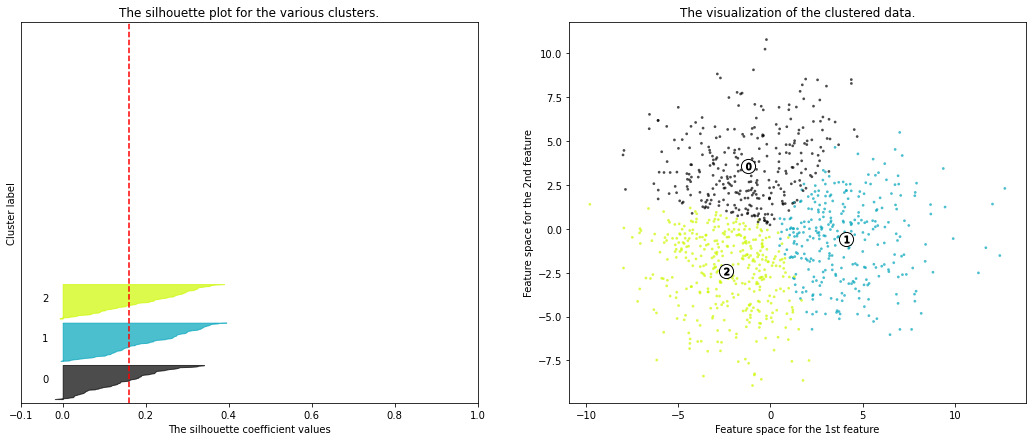

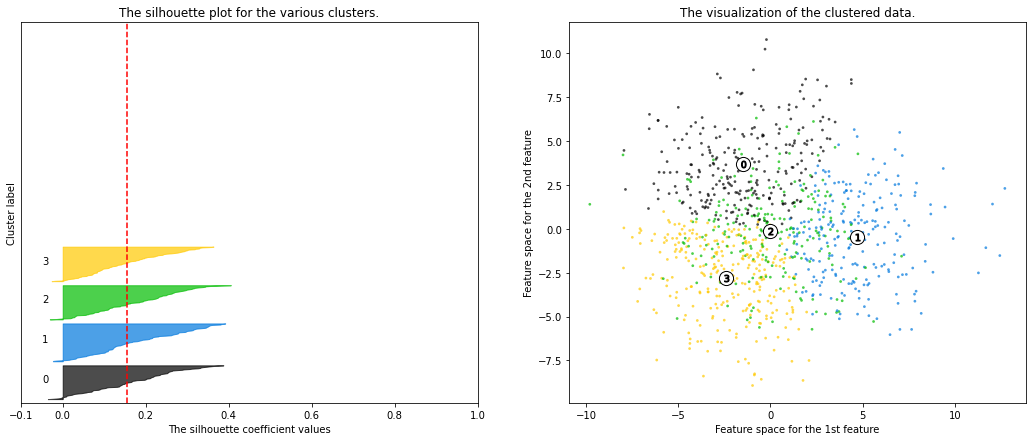

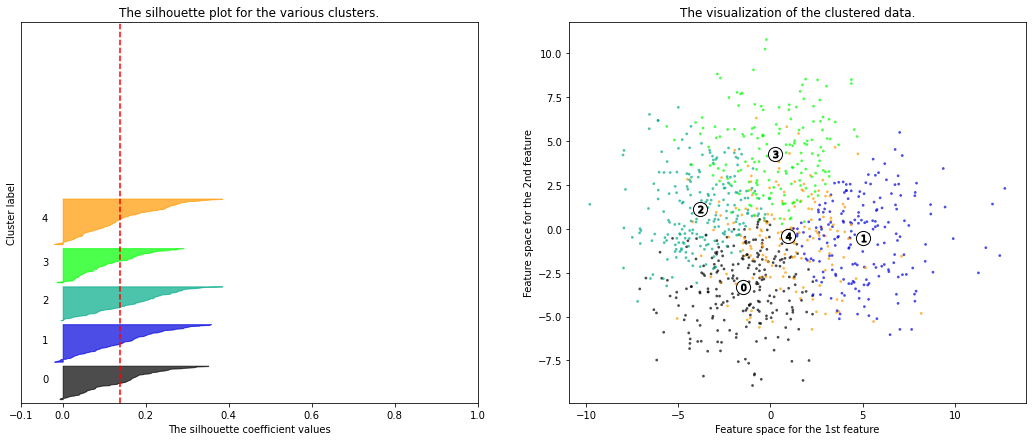

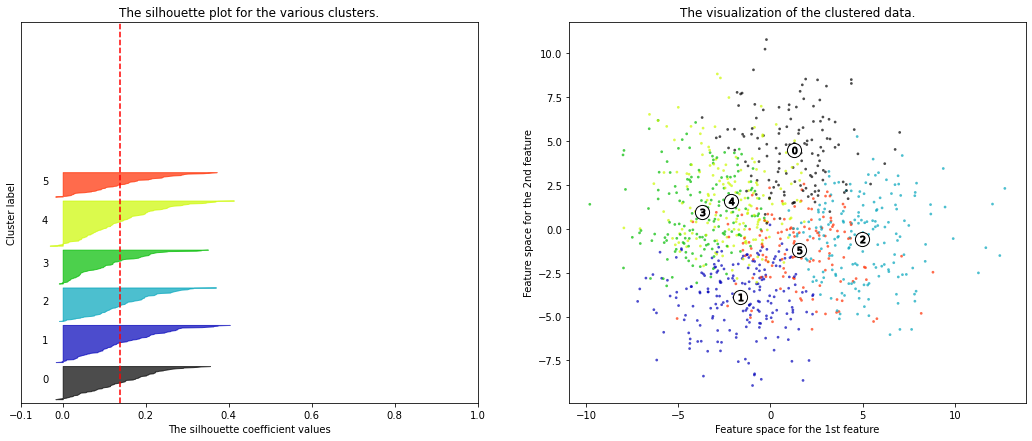

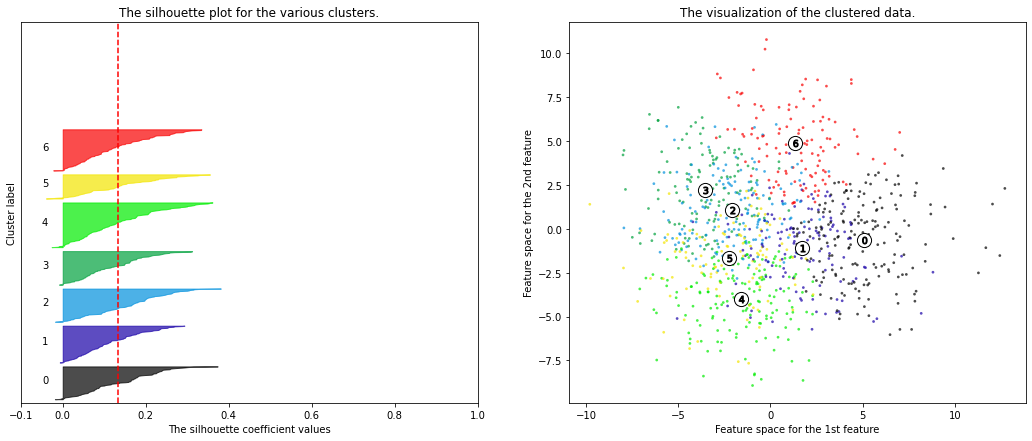

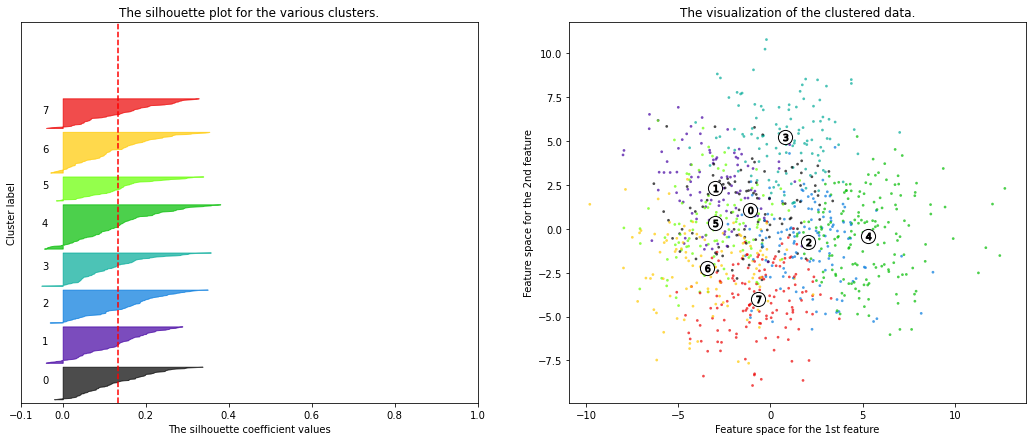

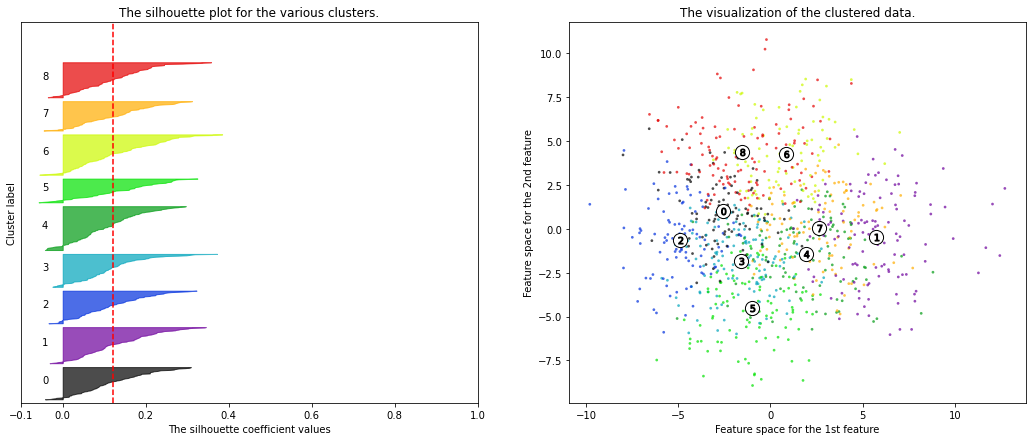

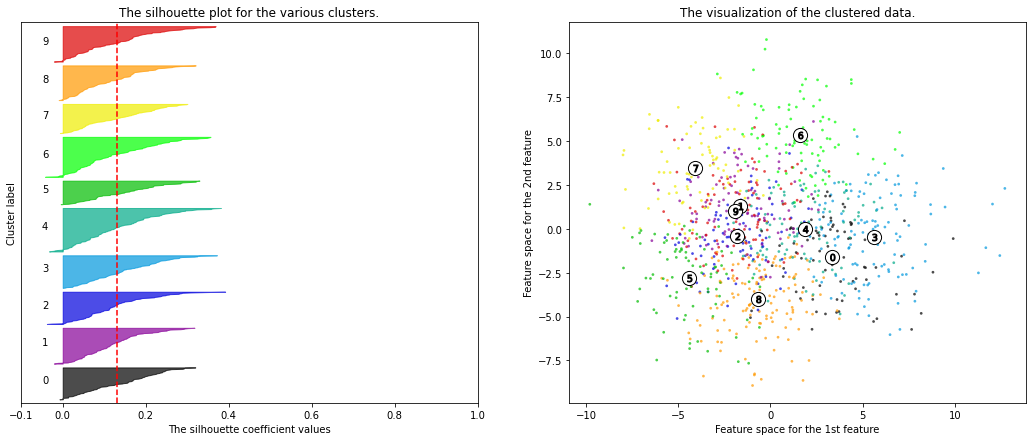

In [38]:
for n_clusters in range(3,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(workdf_tot_trans) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    y_predict_2 = clusterer.fit_predict(workdf_tot_trans)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(workdf_tot_trans, y_predict_2)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(workdf_tot_trans, y_predict_2)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[y_predicted == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(y_predict_2.astype(float) / n_clusters)
    ax2.scatter(
        workdf_tot_trans[:, 0], workdf_tot_trans[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.set_title("The visualization of the clustered data.")
plt.show()

As we have noticed, the optimal number of clusters, such that the average silhouette coefficient is the maximized, is equal to 3. Hence we have run the k-Means algorithm for the actual number of clusters:

In [39]:
KM_tot = KMeans(n_clusters = 3, random_state = rs)
KM_tot.fit(workdf_tot_trans)
y_predict1 = KM_tot.predict(workdf_tot_trans)
# centroids.append(KM_tot.cluster_centers_)
# silhouette_vals.append(silhouette_score(workdf_tot_trans,y_predict))

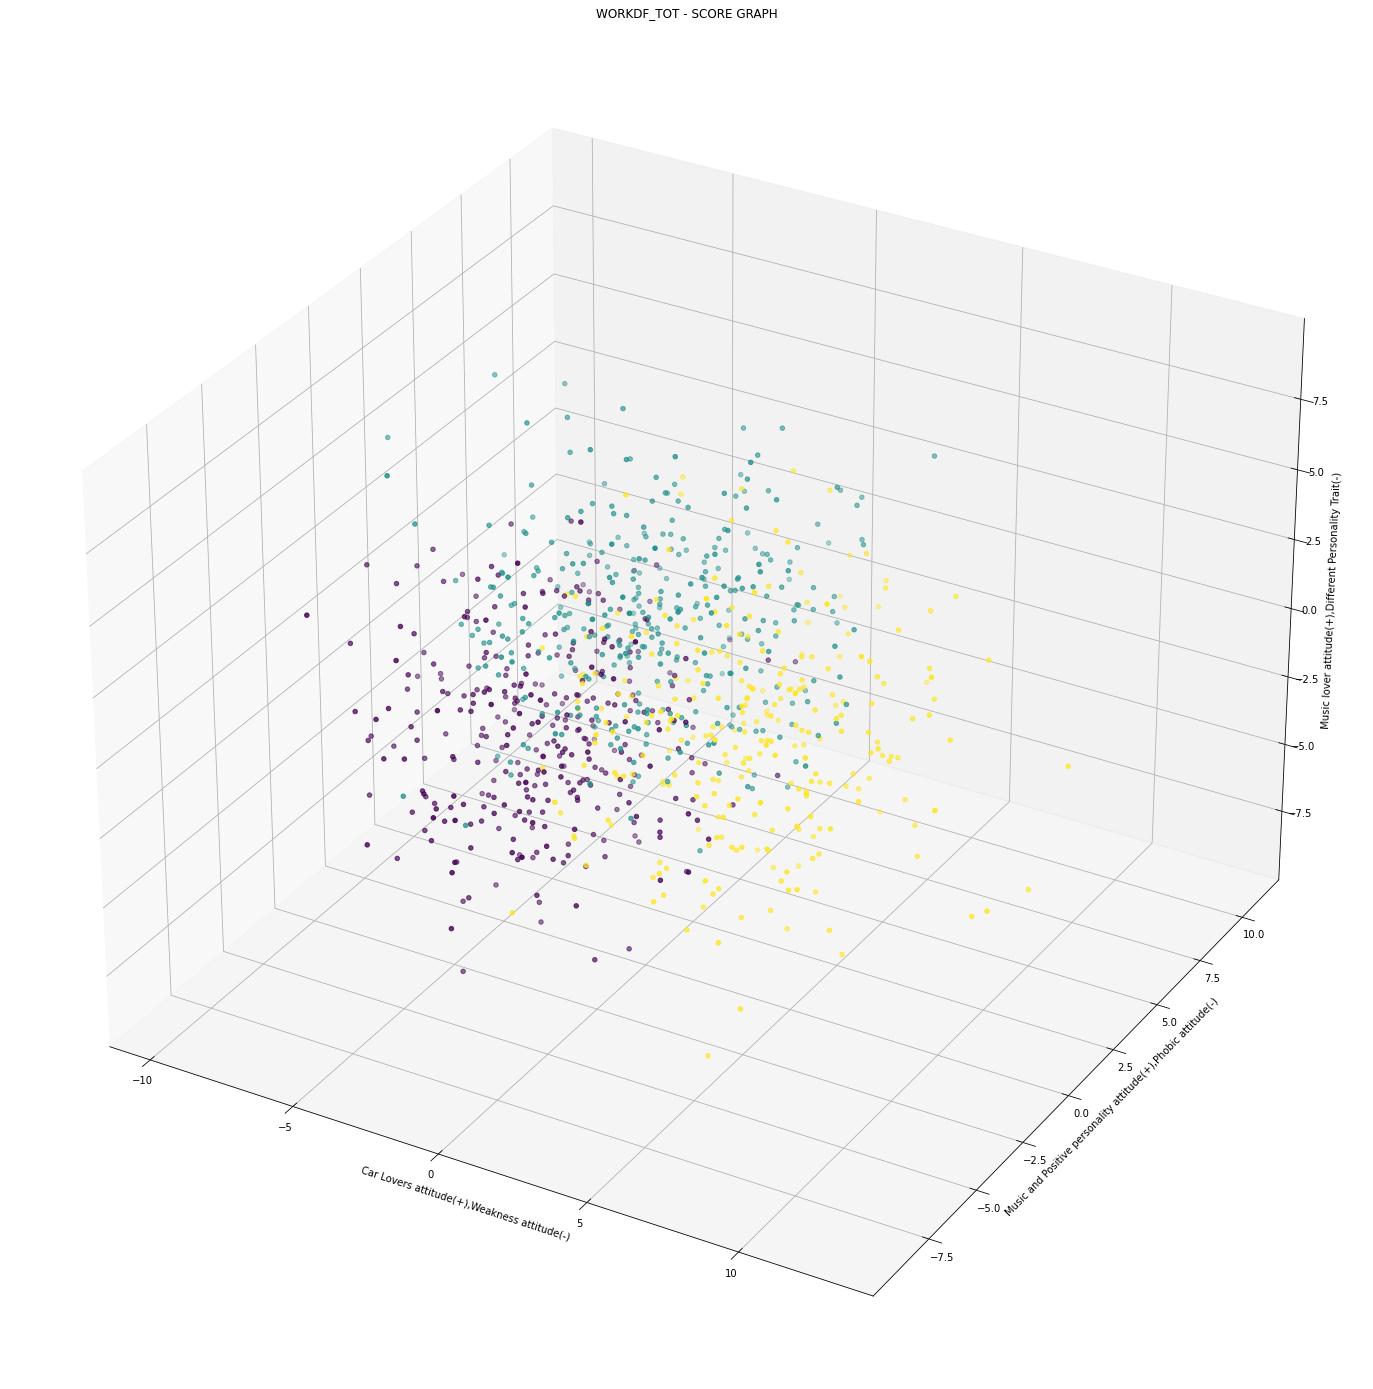

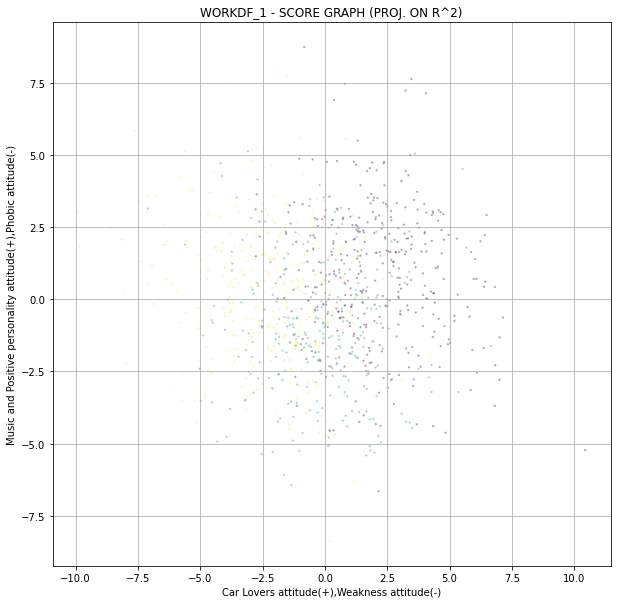

In [40]:
# MAKE THE 3D SCORE GRAPH
fig_score = plt.figure(figsize = (25,25))
ax = fig_score.add_subplot(111, projection='3d')
ax.scatter(workdf_tot_trans[:, 0], workdf_tot_trans[:, 1], workdf_tot_trans[:, 2], c = y_predict)
plt.title('WORKDF_TOT - SCORE GRAPH')
ax.set_xlabel('Car Lovers attitude(+),Weakness attitude(-)')
ax.set_ylabel('Music and Positive personality attitude(+),Phobic attitude(-)')
ax.set_zlabel('Music lover attitude(+),Different Personality Trait(-)')
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure(figsize=(10,10))
plt.scatter(workdf_1_trans[:, 0], workdf_1_trans[:, 1], s=2, c=y_predict1, alpha=0.25)
plt.title('WORKDF_1 - SCORE GRAPH (PROJ. ON R^2)')
plt.xlabel('Car Lovers attitude(+),Weakness attitude(-)')
plt.ylabel('Music and Positive personality attitude(+),Phobic attitude(-)')
plt.grid()
plt.show()